# Part 6 -- Creation of one unique dataset and correlation analysis

_Foreword_

The goal of this jupyter notebook is to analyze the different correlation of the different variables I created. This part creates the connection between the several variables I have and this will be very useful to understand how to create my proximity indices and to write my paper later.

We decide to analyze the following relation, since we believe they are the most meaningful relations to explore among our datasets.

__1) Creation and correlation analysis of a complete dataset regrouping all information for this project__

_1.1) Creation dataset_

_1.2) Correlation analysis of the dataset_

__2) Correlation analysis among some of my datasets__

_2.1) H-indices and concepts_ \
Here, we will consider how concepts and h-indices are related to each other, and more specifically, if concepts to which authors with high h-index are related, necessarily are themselves important concepts (lot of papers, high average score of attribution etc.)

_2.2) Concepts and keywords_ \
In this part, we will analyze what are the most important keywords for each concept and how this evolves in time.

In [1]:
%%html
<marquee style='width: 30%; color: green;'><b>Let us start correlation analysis!</b></marquee>

IMPORTING LIBRARIES

Before we get started, let's import all necessary libraries for performing our data analysis:

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from scipy import stats
import re
import nltk
import missingno as msno
from tqdm import tqdm
import json
import statistics
import math
import time

nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
from gensim.models import Phrases
from collections import Counter
from pandas.api.types import CategoricalDtype

# enabling Jupyter Lab to include the output of our plots directly in this notebook
%matplotlib inline


# used to avoid blurry output plots in Jupyter Notebooks
%config InLineBackend.figure_format = "retina"

pd.options.mode.chained_assignment = None

__Download of the data__

I download, once and for all, all the dataset I will analyze in this correlation analysis.

In [40]:
infile_df_full_cleaned = open('data_exploratory_analysis/df_full_cleaned','rb')
df_full_cleaned = pickle.load(infile_df_full_cleaned)
infile_df_full_cleaned.close()

In [48]:
infile_dicofconcepts_full = open('../creation_data_and_variables/data_creation_variables/dicofconcepts','rb')
dfconcepts = pickle.load(infile_dicofconcepts_full)
infile_dicofconcepts_full.close()

In [49]:
infile_dfkeywords_full = open('../creation_data_and_variables/data_creation_variables/dfkeywords','rb')
dfkeywords = pickle.load(infile_dfkeywords_full)
infile_dfkeywords_full.close()

In [50]:
infile_df_h_indices = open('../creation_data_and_variables/data_creation_variables/df_h_indices','rb')
dfhindices = pickle.load(infile_df_h_indices)
infile_df_h_indices.close()

__1.1) Creation dataset__

I first create a dataset regrouping all information I computed so far in this project. To achieve this I created an implode version of my dataframe "df_full_cleaned", such that I can merge it to other datasets. I create an imploded version of subsets of "df_full_cleaned" to merge them again together in an imploded version of "df_full_cleaned".

I rename the first column of "df_full_cleaned" "paper" in order to merge it later with other datasets.

I create an imploded version of "df_author" with only papers and authors.

In [7]:
df_author = df_full_cleaned[['paper','author']]
df_author = df_author.drop_duplicates()

In [8]:
df1 = (df_author.groupby(['paper'])
      .agg({'author': lambda x: x.tolist()})
      .reset_index())

I create an imploded version of "df_ref" with only papers and referenced works.

In [9]:
df_ref = df_full_cleaned[['paper','referenced_works']]
df_ref = df_ref.drop_duplicates()

In [10]:
df2 = (df_ref.groupby(['paper'])
      .agg({'referenced_works': lambda x: x.tolist()})
      .reset_index())

I create an imploded version of "df_concepts" with only papers, concepts and score of concepts.

In [11]:
df_concepts=df_full_cleaned[['paper','concepts','score_concepts']]
df_concepts = df_concepts.drop_duplicates()

In [12]:
df3 = (df_concepts.groupby(['paper'])
      .agg({'concepts': lambda x: x.tolist(),'score_concepts': lambda x: x.tolist()})
      .reset_index())

I visualize briefly the several datasets I created.

In [13]:
df1

paper  \
0       https://openalex.org/W1000018889   
1        https://openalex.org/W100004108   
2       https://openalex.org/W1000206743   
3       https://openalex.org/W1000368397   
4       https://openalex.org/W1000558944   
...                                  ...   
131115    https://openalex.org/W99881002   
131116   https://openalex.org/W998997404   
131117    https://openalex.org/W99938045   
131118   https://openalex.org/W999768700   
131119   https://openalex.org/W999914091   

                                                   author  
0       [https://openalex.org/A2107438709, https://ope...  
1       [https://openalex.org/A2017661848, https://ope...  
2       [https://openalex.org/A2936135971, https://ope...  
3                      [https://openalex.org/A2112191549]  
4                      [https://openalex.org/A2169767923]  
...                                                   ...  
131115  [https://openalex.org/A337017328, https://open...  
131116  [https://openalex.org/A2886131550, https://ope...  
131117  [https://openalex.org/A2396724737, https://ope...  
131118  [https://openalex.org/A2134580343, https://ope...  
131119  [https://openalex.org/A2133550925, https://ope...  

[131120 rows x 2 columns]

In [14]:
df2

paper  \
0       https://openalex.org/W1000018889   
1        https://openalex.org/W100004108   
2       https://openalex.org/W1000206743   
3       https://openalex.org/W1000368397   
4       https://openalex.org/W1000558944   
...                                  ...   
131115    https://openalex.org/W99881002   
131116   https://openalex.org/W998997404   
131117    https://openalex.org/W99938045   
131118   https://openalex.org/W999768700   
131119   https://openalex.org/W999914091   

                                         referenced_works  
0       [https://openalex.org/W1821135345, https://ope...  
1       [https://openalex.org/W150310457, https://open...  
2       [https://openalex.org/W2116665839, https://ope...  
3       [https://openalex.org/W1591966860, https://ope...  
4                      [https://openalex.org/W1790978359]  
...                                                   ...  
131115  [https://openalex.org/W13154674, https://opena...  
131116  [https://openalex.org/W2014022156, https://ope...  
131117  [https://openalex.org/W173253993, https://open...  
131118  [https://openalex.org/W1498316612, https://ope...  
131119  [https://openalex.org/W1968781463, https://ope...  

[131120 rows x 2 columns]

In [15]:
df3

paper  \
0       https://openalex.org/W1000018889   
1        https://openalex.org/W100004108   
2       https://openalex.org/W1000206743   
3       https://openalex.org/W1000368397   
4       https://openalex.org/W1000558944   
...                                  ...   
131115    https://openalex.org/W99881002   
131116   https://openalex.org/W998997404   
131117    https://openalex.org/W99938045   
131118   https://openalex.org/W999768700   
131119   https://openalex.org/W999914091   

                                                 concepts  \
0       [Authentication protocole, Biometrics, Blockch...   
1       [Authentication protocole, Biometrics, Blockch...   
2       [Authentication protocole, Biometrics, Blockch...   
3       [Authentication protocole, Biometrics, Blockch...   
4       [Authentication protocole, Biometrics, Blockch...   
...                                                   ...   
131115  [Authentication protocole, Biometrics, Blockch...   
131116  [Authentication protocole, Biometrics, Blockch...   
131117  [Authentication protocole, Biometrics, Blockch...   
131118  [Authentication protocole, Biometrics, Blockch...   
131119  [Authentication protocole, Biometrics, Blockch...   

                                           score_concepts  
0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1       [0, 0.7463003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
2       [0, 0, 0, 0, 0, 0.82105684, 0, 0, 0, 0, 0, 0, ...  
3       [0, 0, 0, 0, 0.6261427, 0, 0, 0, 0, 0, 0, 0, 0...  
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
...                                                   ...  
131115  [0.4243689, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
131116  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
131117  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
131118  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
131119  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5314525...  

[131120 rows x 3 columns]

Now I merge all these dataframes together.

In [16]:
df1_2 = pd.merge(df1, df2, on='paper', how='inner')
df1_2

paper  \
0       https://openalex.org/W1000018889   
1        https://openalex.org/W100004108   
2       https://openalex.org/W1000206743   
3       https://openalex.org/W1000368397   
4       https://openalex.org/W1000558944   
...                                  ...   
131115    https://openalex.org/W99881002   
131116   https://openalex.org/W998997404   
131117    https://openalex.org/W99938045   
131118   https://openalex.org/W999768700   
131119   https://openalex.org/W999914091   

                                                   author  \
0       [https://openalex.org/A2107438709, https://ope...   
1       [https://openalex.org/A2017661848, https://ope...   
2       [https://openalex.org/A2936135971, https://ope...   
3                      [https://openalex.org/A2112191549]   
4                      [https://openalex.org/A2169767923]   
...                                                   ...   
131115  [https://openalex.org/A337017328, https://open...   
131116  [https://openalex.org/A2886131550, https://ope...   
131117  [https://openalex.org/A2396724737, https://ope...   
131118  [https://openalex.org/A2134580343, https://ope...   
131119  [https://openalex.org/A2133550925, https://ope...   

                                         referenced_works  
0       [https://openalex.org/W1821135345, https://ope...  
1       [https://openalex.org/W150310457, https://open...  
2       [https://openalex.org/W2116665839, https://ope...  
3       [https://openalex.org/W1591966860, https://ope...  
4                      [https://openalex.org/W1790978359]  
...                                                   ...  
131115  [https://openalex.org/W13154674, https://opena...  
131116  [https://openalex.org/W2014022156, https://ope...  
131117  [https://openalex.org/W173253993, https://open...  
131118  [https://openalex.org/W1498316612, https://ope...  
131119  [https://openalex.org/W1968781463, https://ope...  

[131120 rows x 3 columns]

In [17]:
dfall = pd.merge(df1_2, df3, on='paper', how='inner')
dfall

paper  \
0       https://openalex.org/W1000018889   
1        https://openalex.org/W100004108   
2       https://openalex.org/W1000206743   
3       https://openalex.org/W1000368397   
4       https://openalex.org/W1000558944   
...                                  ...   
131115    https://openalex.org/W99881002   
131116   https://openalex.org/W998997404   
131117    https://openalex.org/W99938045   
131118   https://openalex.org/W999768700   
131119   https://openalex.org/W999914091   

                                                   author  \
0       [https://openalex.org/A2107438709, https://ope...   
1       [https://openalex.org/A2017661848, https://ope...   
2       [https://openalex.org/A2936135971, https://ope...   
3                      [https://openalex.org/A2112191549]   
4                      [https://openalex.org/A2169767923]   
...                                                   ...   
131115  [https://openalex.org/A337017328, https://open...   
131116  [https://openalex.org/A2886131550, https://ope...   
131117  [https://openalex.org/A2396724737, https://ope...   
131118  [https://openalex.org/A2134580343, https://ope...   
131119  [https://openalex.org/A2133550925, https://ope...   

                                         referenced_works  \
0       [https://openalex.org/W1821135345, https://ope...   
1       [https://openalex.org/W150310457, https://open...   
2       [https://openalex.org/W2116665839, https://ope...   
3       [https://openalex.org/W1591966860, https://ope...   
4                      [https://openalex.org/W1790978359]   
...                                                   ...   
131115  [https://openalex.org/W13154674, https://opena...   
131116  [https://openalex.org/W2014022156, https://ope...   
131117  [https://openalex.org/W173253993, https://open...   
131118  [https://openalex.org/W1498316612, https://ope...   
131119  [https://openalex.org/W1968781463, https://ope...   

                                                 concepts  \
0       [Authentication protocole, Biometrics, Blockch...   
1       [Authentication protocole, Biometrics, Blockch...   
2       [Authentication protocole, Biometrics, Blockch...   
3       [Authentication protocole, Biometrics, Blockch...   
4       [Authentication protocole, Biometrics, Blockch...   
...                                                   ...   
131115  [Authentication protocole, Biometrics, Blockch...   
131116  [Authentication protocole, Biometrics, Blockch...   
131117  [Authentication protocole, Biometrics, Blockch...   
131118  [Authentication protocole, Biometrics, Blockch...   
131119  [Authentication protocole, Biometrics, Blockch...   

                                           score_concepts  
0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1       [0, 0.7463003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
2       [0, 0, 0, 0, 0, 0.82105684, 0, 0, 0, 0, 0, 0, ...  
3       [0, 0, 0, 0, 0.6261427, 0, 0, 0, 0, 0, 0, 0, 0...  
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
...                                                   ...  
131115  [0.4243689, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
131116  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
131117  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
131118  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
131119  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5314525...  

[131120 rows x 5 columns]

I create a dataframe "dfauxiliary" with information of "df_full_cleaned", that were not in the datasets above, such that I can recreate an imploded version "df_full_cleaned" with everything.

In [18]:
dfauxiliary = df_full_cleaned[['paper','title','publication_date','abstract','year','month']]
dfauxiliary = dfauxiliary.drop_duplicates()

In [19]:
dfauxiliary

paper  \
2       https://openalex.org/W2160584199   
3       https://openalex.org/W2007287631   
4       https://openalex.org/W2111303254   
5       https://openalex.org/W2122991569   
6       https://openalex.org/W1965515427   
...                                  ...   
285704  https://openalex.org/W4318147592   
285708    https://openalex.org/W59628553   
285709    https://openalex.org/W68738888   
285710    https://openalex.org/W70222459   
285715    https://openalex.org/W98729159   

                                                    title publication_date  \
2       Authenticating Pervasive Devices with Human Pr...       2005-08-14   
3       Two-factor user authentication in wireless sen...       2009-03-01   
4       Comparing passwords, tokens, and biometrics fo...       2003-12-01   
5       ECPP: Efficient Conditional Privacy Preservati...       2008-04-13   
6       SASI: A New Ultralightweight RFID Authenticati...       2007-10-01   
...                                                   ...              ...   
285704  Smardy: Zero-Trust FAIR Marketplace for Resear...       2022-12-17   
285708  Authenticating Grid Using Graph Isomorphism Ba...       2014-12-15   
285709           A Generic Scheme for Zero-Knowledge Sets       2005-05-09   
285710  An Approach for Security Protocol Design Based...       2011-07-09   
285715  Zero-knowledge against quantum attacks (Prelim...       2005-12-15   

                                                 abstract  year     month  
2        AbstractForgery and counterfeiting are emergi...  2005    August  
3        Wireless sensor networks (WSN) are typically ...  2009     March  
4        For decades, the password has been the standa...  2003  December  
5        We introduce an efficient conditional privacy...  2008     April  
6        As low-cost RFIDs become more and more popula...  2007   October  
...                                                   ...   ...       ...  
285704                                                 --  2022  December  
285708   A zero-Knowledge proof is a method by which t...  2014  December  
285709   Zero-Knowledge sets, proposed by Micali et al...  2005       May  
285710   The paper deals with automated methods for th...  2011      July  
285715   This paperprovesthat several interactiveproof...  2005  December  

[131120 rows x 6 columns]

In [20]:
df_full_imploded = pd.merge(dfauxiliary, dfall, on='paper', how='inner')
df_full_imploded

paper  \
0       https://openalex.org/W2160584199   
1       https://openalex.org/W2007287631   
2       https://openalex.org/W2111303254   
3       https://openalex.org/W2122991569   
4       https://openalex.org/W1965515427   
...                                  ...   
131115  https://openalex.org/W4318147592   
131116    https://openalex.org/W59628553   
131117    https://openalex.org/W68738888   
131118    https://openalex.org/W70222459   
131119    https://openalex.org/W98729159   

                                                    title publication_date  \
0       Authenticating Pervasive Devices with Human Pr...       2005-08-14   
1       Two-factor user authentication in wireless sen...       2009-03-01   
2       Comparing passwords, tokens, and biometrics fo...       2003-12-01   
3       ECPP: Efficient Conditional Privacy Preservati...       2008-04-13   
4       SASI: A New Ultralightweight RFID Authenticati...       2007-10-01   
...                                                   ...              ...   
131115  Smardy: Zero-Trust FAIR Marketplace for Resear...       2022-12-17   
131116  Authenticating Grid Using Graph Isomorphism Ba...       2014-12-15   
131117           A Generic Scheme for Zero-Knowledge Sets       2005-05-09   
131118  An Approach for Security Protocol Design Based...       2011-07-09   
131119  Zero-knowledge against quantum attacks (Prelim...       2005-12-15   

                                                 abstract  year     month  \
0        AbstractForgery and counterfeiting are emergi...  2005    August   
1        Wireless sensor networks (WSN) are typically ...  2009     March   
2        For decades, the password has been the standa...  2003  December   
3        We introduce an efficient conditional privacy...  2008     April   
4        As low-cost RFIDs become more and more popula...  2007   October   
...                                                   ...   ...       ...   
131115                                                 --  2022  December   
131116   A zero-Knowledge proof is a method by which t...  2014  December   
131117   Zero-Knowledge sets, proposed by Micali et al...  2005       May   
131118   The paper deals with automated methods for th...  2011      July   
131119   This paperprovesthat several interactiveproof...  2005  December   

                                                   author  \
0       [https://openalex.org/A46726047, https://opena...   
1                      [https://openalex.org/A2148661923]   
2                      [https://openalex.org/A2294082537]   
3       [https://openalex.org/A2107148058, https://ope...   
4                      [https://openalex.org/A2128961745]   
...                                                   ...   
131115  [https://openalex.org/A4318149390, https://ope...   
131116  [https://openalex.org/A2293502584, https://ope...   
131117  [https://openalex.org/A2974579908, https://ope...   
131118                 [https://openalex.org/A2158388827]   
131119                 [https://openalex.org/A1944891737]   

                                         referenced_works  \
0                      [https://openalex.org/W1514141030]   
1       [https://openalex.org/W1521079621, https://ope...   
2                      [https://openalex.org/W2131919573]   
3       [https://openalex.org/W2002429869, https://ope...   
4       [https://openalex.org/W1481962261, https://ope...   
...                                                   ...   
131115  [https://openalex.org/W74897528, https://opena...   
131116  [https://openalex.org/W3384512, https://openal...   
131117  [https://openalex.org/W2166618966, https://ope...   
131118                 [https://openalex.org/W2503491286]   
131119  [https://openalex.org/W178666261, https://open...   

                                                 concepts  \
0       [Authentication protocole, Biometrics, Blockch...   
1       [Authentication protocole, Biometrics, Blockch..

Now, I do have a complete imploded version of "df_full_cleaned". I check that I have indeed the right number of papers.

In [21]:
len(list(set(df_full_imploded.paper.tolist())))

131120

Everything is fine, I can consider the dataset dfkeywords to add it to my original dataset.

In [22]:
dfkeywords

paper       keyword cosine_similarity  \
0       https://openalex.org/W2783758105        scheme            0.4216   
0       https://openalex.org/W2783758105  cryptographi            0.3989   
0       https://openalex.org/W2783758105      protocol            0.3637   
0       https://openalex.org/W2783758105          coin            0.3613   
0       https://openalex.org/W2783758105        effici            0.3052   
...                                  ...           ...               ...   
131119  https://openalex.org/W2149431324         manet            0.4252   
131119  https://openalex.org/W2149431324          tree             0.322   
131119  https://openalex.org/W2149431324           pki            0.3216   
131119  https://openalex.org/W2149431324        binari            0.3202   
131119  https://openalex.org/W2149431324          node            0.2997   

       publication_date  year     month  
0            2017-10-01  2017   October  
0            2017-10-01  2017   October  
0            2017-10-01  2017   October  
0            2017-10-01  2017   October  
0            2017-10-01  2017   October  
...                 ...   ...       ...  
131119       2008-12-30  2008  December  
131119       2008-12-30  2008  December  
131119       2008-12-30  2008  December  
131119       2008-12-30  2008  December  
131119       2008-12-30  2008  December  

[653471 rows x 6 columns]

I select only the information I am interested in and implode dfkeywords.

In [23]:
dfkeyred =dfkeywords[['paper','keyword','cosine_similarity']]

In [24]:
dfkey_imploded = (dfkeyred.groupby(['paper'])
      .agg({'keyword': lambda x: x.tolist(),'cosine_similarity': lambda x: x.tolist()})
      .reset_index())

In [25]:
dfkey_imploded

paper  \
0       https://openalex.org/W1000018889   
1        https://openalex.org/W100004108   
2       https://openalex.org/W1000206743   
3       https://openalex.org/W1000368397   
4       https://openalex.org/W1000558944   
...                                  ...   
131115    https://openalex.org/W99881002   
131116   https://openalex.org/W998997404   
131117    https://openalex.org/W99938045   
131118   https://openalex.org/W999768700   
131119   https://openalex.org/W999914091   

                                                  keyword  \
0           [enforc, servic, framework, trust, smartphon]   
1                 [gait, view, camera, recognit, surveil]   
2                   [rsa, digit, signatur, encrypt, data]   
3       [watermarkingdigit, digit, copyright, fingerpr...   
4                   [iec, evid, claimant, verif, process]   
...                                                   ...   
131115  [protocol, cryptograph, skeleton, homomorph, m...   
131116                     [kga, secur, attack, dpek, kg]   
131117    [protocol, physic, prover, fingerprint, formal]   
131118              [encrypt, bsn, ciphertext, abe, bodi]   
131119  [keywordsimag, retrievalhash, index, algorithm...   

                               cosine_similarity  
0        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]  
1        [0.409, 0.3371, 0.3047, 0.2956, 0.2899]  
2        [0.444, 0.3355, 0.3236, 0.3214, 0.3118]  
3       [0.4913, 0.3855, 0.3553, 0.3521, 0.3392]  
4       [0.4442, 0.3275, 0.3061, 0.3026, 0.2967]  
...                                          ...  
131115   [0.4823, 0.4655, 0.444, 0.3247, 0.3053]  
131116    [0.3499, 0.335, 0.3294, 0.3202, 0.304]  
131117  [0.4189, 0.3264, 0.3201, 0.3088, 0.3022]  
131118  [0.3855, 0.3199, 0.2778, 0.2683, 0.2502]  
131119  [0.4641, 0.4246, 0.4054, 0.3436, 0.3342]  

[131120 rows x 3 columns]

I check that the number of papers is correct.

In [26]:
len(list(set(dfkey_imploded.paper.tolist())))

131120

I can now merge the dataset "dfkey_imploded" with "df_full_imploded", which already extends my database.

In [27]:
df_full_extended = pd.merge(dfkey_imploded, df_full_imploded, on='paper', how='inner')
df_full_extended

paper  \
0       https://openalex.org/W1000018889   
1        https://openalex.org/W100004108   
2       https://openalex.org/W1000206743   
3       https://openalex.org/W1000368397   
4       https://openalex.org/W1000558944   
...                                  ...   
131115    https://openalex.org/W99881002   
131116   https://openalex.org/W998997404   
131117    https://openalex.org/W99938045   
131118   https://openalex.org/W999768700   
131119   https://openalex.org/W999914091   

                                                  keyword  \
0           [enforc, servic, framework, trust, smartphon]   
1                 [gait, view, camera, recognit, surveil]   
2                   [rsa, digit, signatur, encrypt, data]   
3       [watermarkingdigit, digit, copyright, fingerpr...   
4                   [iec, evid, claimant, verif, process]   
...                                                   ...   
131115  [protocol, cryptograph, skeleton, homomorph, m...   
131116                     [kga, secur, attack, dpek, kg]   
131117    [protocol, physic, prover, fingerprint, formal]   
131118              [encrypt, bsn, ciphertext, abe, bodi]   
131119  [keywordsimag, retrievalhash, index, algorithm...   

                               cosine_similarity  \
0        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
1        [0.409, 0.3371, 0.3047, 0.2956, 0.2899]   
2        [0.444, 0.3355, 0.3236, 0.3214, 0.3118]   
3       [0.4913, 0.3855, 0.3553, 0.3521, 0.3392]   
4       [0.4442, 0.3275, 0.3061, 0.3026, 0.2967]   
...                                          ...   
131115   [0.4823, 0.4655, 0.444, 0.3247, 0.3053]   
131116    [0.3499, 0.335, 0.3294, 0.3202, 0.304]   
131117  [0.4189, 0.3264, 0.3201, 0.3088, 0.3022]   
131118  [0.3855, 0.3199, 0.2778, 0.2683, 0.2502]   
131119  [0.4641, 0.4246, 0.4054, 0.3436, 0.3342]   

                                                    title publication_date  \
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
1       Gait Based Human Identity Recognition from Mul...       2012-09-04   
2       Modified RSA Digital Signature Scheme for Data...       2014-11-18   
3       Research on Copyright Management of Digital Li...       2011-12-23   
4       A Generalization of ISO/IEC 24761 to Enhance R...       2015-05-26   
...                                                   ...              ...   
131115                Skeletons and the Shapes of Bundles       2005-01-01   
131116  On security against the server in designated t...       2015-12-01   
131117  Physical Zero-Knowledge Proofs of Physical Pro...       2014-08-17   
131118  A Study of Attribute-Based Encryption for Body...       2011-11-14   
131119  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   

                                                 abstract  year      month  \
0        Both in the cloud and mobile environments, a ...  2013   December   
1        In this paper we propose a novel multi-view f...  2012  September   
2        As we know that digital signature is an authe...  2014   November   
3        With the rapid advancement of digital technol...  2011   December   
4        In this paper, a data structure to enhance re...  2015        May   
...                                                   ...   ...        ...   
131115   Skeletons model partial information about reg...  2005    January   
131116   The offline keyword guessing attack (KG attac...  2015   December   
131117   Is it possible to prove that two DNA-fingerpr...  2014     August   
131118   Body sensor network (BSN) is a network with s...  2011   November   
131119   AbstractIn this paper, we explore the use of ...  2013      March   

                                                   author  \
0       [https://openalex.org/A2107438709, https://ope...   
1       [https://openalex.org/A2017661848, https://ope...   
2       [https://openalex.org/A2936135971, https://ope...   
3                      [https:

I save this version of df_full_extended for further use.

In [28]:
df_full_extended.to_pickle('data_exploratory_analysis/df_full_extended_keywords')

Now, I will add the h-indices to my database. I first visualize what I have: my dataset dfhindices.

In [29]:
dfhindices

author  year      month  \
0         https://openalex.org/A2800469661  2002    January   
1         https://openalex.org/A2800469661  2002   February   
2         https://openalex.org/A2800469661  2002      March   
3         https://openalex.org/A2800469661  2002      April   
4         https://openalex.org/A2800469661  2002        May   
...                                    ...   ...        ...   
45428035  https://openalex.org/A2763418023  2022     August   
45428036  https://openalex.org/A2763418023  2022  September   
45428037  https://openalex.org/A2763418023  2022    October   
45428038  https://openalex.org/A2763418023  2022   November   
45428039  https://openalex.org/A2763418023  2022   December   

          yearly_H_index_notincremental  yearly_H_index_incremental  \
0                                     0                           0   
1                                     0                           0   
2                                     0                           0   
3                                     0                           0   
4                                     0                           0   
...                                 ...                         ...   
45428035                              1                           2   
45428036                              1                           2   
45428037                              1                           2   
45428038                              1                           2   
45428039                              1                           2   

          monthly_H_index_incremental  monthly_H_index_notincremental  
0                                   0                               0  
1                                   0                               0  
2                                   0                               0  
3                                   0                               0  
4                                   0                               0  
...                               ...                             ...  
45428035                            2                               0  
45428036                            2                               0  
45428037                            2                               1  
45428038                            2                               0  
45428039                            2                               0  

[45428040 rows x 7 columns]

I explode the column author of "df_full_extended" and keep only the necessary columns. I do not delete the duplicates, because this generates errors when elements in the rows are lists (it displays "not hashable item") and in fact, since I imploded my dataset, cancelling some columns do not create duplicates anymore. I add the columns related to the h-indices to my dataset, in order to fill it later with information from "dfhindices".

In [30]:
df_aux_authors = df_full_extended.explode('author')

df_aux_authors = df_aux_authors[['paper','year','month','author']]

df_aux_authors['yearly_H_index_notincremental']=np.nan
df_aux_authors['yearly_H_index_incremental']=np.nan
df_aux_authors['monthly_H_index_incremental']=np.nan
df_aux_authors['monthly_H_index_notincremental']=np.nan

df_aux_authors

paper  year      month  \
0       https://openalex.org/W1000018889  2013   December   
0       https://openalex.org/W1000018889  2013   December   
0       https://openalex.org/W1000018889  2013   December   
0       https://openalex.org/W1000018889  2013   December   
1        https://openalex.org/W100004108  2012  September   
...                                  ...   ...        ...   
131118   https://openalex.org/W999768700  2011   November   
131118   https://openalex.org/W999768700  2011   November   
131118   https://openalex.org/W999768700  2011   November   
131119   https://openalex.org/W999914091  2013      March   
131119   https://openalex.org/W999914091  2013      March   

                                  author  yearly_H_index_notincremental  \
0       https://openalex.org/A2107438709                            NaN   
0       https://openalex.org/A2311169168                            NaN   
0       https://openalex.org/A2140477378                            NaN   
0        https://openalex.org/A252575161                            NaN   
1       https://openalex.org/A2017661848                            NaN   
...                                  ...                            ...   
131118  https://openalex.org/A2057853179                            NaN   
131118  https://openalex.org/A2091883170                            NaN   
131118  https://openalex.org/A2157543615                            NaN   
131119  https://openalex.org/A2133550925                            NaN   
131119  https://openalex.org/A2210425818                            NaN   

        yearly_H_index_incremental  monthly_H_index_incremental  \
0                              NaN                          NaN   
0                              NaN                          NaN   
0                              NaN                          NaN   
0                              NaN                          NaN   
1                              NaN                          NaN   
...                            ...                          ...   
131118                         NaN                          NaN   
131118                         NaN                          NaN   
131118                         NaN                          NaN   
131119                         NaN                          NaN   
131119                         NaN                          NaN   

        monthly_H_index_notincremental  
0                                  NaN  
0                                  NaN  
0                                  NaN  
0                                  NaN  
1                                  NaN  
...                                ...  
131118                             NaN  
131118                             NaN  
131118                             NaN  
131119                             NaN  
131119                             NaN  

[431113 rows x 8 columns]

I sort my dataset by years to split it later easily by years.

In [31]:
df_aux_authors = df_aux_authors.sort_values(by='year')
df_aux_authors

paper  year     month  \
34797   https://openalex.org/W2125272473  2002  December   
42284   https://openalex.org/W2165931314  2002    August   
45490   https://openalex.org/W2187365034  2002     April   
8296    https://openalex.org/W1662686370  2002  February   
11738   https://openalex.org/W1965979439  2002    August   
...                                  ...   ...       ...   
122165  https://openalex.org/W4281665090  2022     April   
122165  https://openalex.org/W4281665090  2022     April   
122165  https://openalex.org/W4281665090  2022     April   
122163  https://openalex.org/W4281661904  2022      June   
120878  https://openalex.org/W4226133732  2022    August   

                                  author  yearly_H_index_notincremental  \
34797   https://openalex.org/A2051837146                            NaN   
42284   https://openalex.org/A2091944293                            NaN   
45490   https://openalex.org/A1892259612                            NaN   
8296    https://openalex.org/A1944891737                            NaN   
11738   https://openalex.org/A1981693759                            NaN   
...                                  ...                            ...   
122165  https://openalex.org/A2572524070                            NaN   
122165  https://openalex.org/A2792775945                            NaN   
122165  https://openalex.org/A2118303093                            NaN   
122163  https://openalex.org/A2077519821                            NaN   
120878  https://openalex.org/A2170784007                            NaN   

        yearly_H_index_incremental  monthly_H_index_incremental  \
34797                          NaN                          NaN   
42284                          NaN                          NaN   
45490                          NaN                          NaN   
8296                           NaN                          NaN   
11738                          NaN                          NaN   
...                            ...                          ...   
122165                         NaN                          NaN   
122165                         NaN                          NaN   
122165                         NaN                          NaN   
122163                         NaN                          NaN   
120878                         NaN                          NaN   

        monthly_H_index_notincremental  
34797                              NaN  
42284                              NaN  
45490                              NaN  
8296                               NaN  
11738                              NaN  
...                                ...  
122165                             NaN  
122165                             NaN  
122165                             NaN  
122163                             NaN  
120878                             NaN  

[431113 rows x 8 columns]

I take a subset of "df_aux_authors" to divide all the authors in subgroups. This will make my computations later much more efficient.

In [32]:
df_authors_subauxiliary = df_aux_authors[['year','author','month']]

We do a list, of yearly lists, containing for every month a list with all the authors (more specifically their OpenAlex ids) who published papers during this specific month of this specific year.

In [33]:
mymonths = ['January','February','March','April','May','June','July','August','September','October','November','December']
my_years = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

list_listsublists=[]
for year in my_years:
    myinfoyear = df_authors_subauxiliary.loc[df_authors_subauxiliary['year']==year].copy()
    listyear=[]
    for month in mymonths:
        myinfo = myinfoyear.loc[myinfoyear['month']==month].copy()
        listauthors_thismonth = list(set(myinfo.author.tolist()))
        listyear.append(listauthors_thismonth)
    list_listsublists.append(listyear)

__Observation__

The function below takes a paper from the database "df_aux_authors" and attributes the right information about the h-indices for the author present in this occurence of the paper. It completes the information of "df_aux_authors" with the information of "dfhindices". Naturally, many information of "dfhindices" are lost. In fact, in this dataframe there are information about the h-indices for all the years and months from 2002 to 2022 for all authors, while in "df_aux_authors" I only have information about authors for the months when they published papers. This makes sense, since the temporal anchor of my time series is the publication date of my papers. So I do not have all the information from "dfhindices", but I have all the information I will use later in the computation of the proximity indices and so on. 

In [34]:
def add_info_hindices(paper,dfhindices):
    #we select the row we are interested in
    myinfo = dfhindices.loc[dfhindices ['author'] == paper.author].copy()
    
    #we update the np.nan with the right values
    paper.loc["yearly_H_index_notincremental"] = myinfo.yearly_H_index_notincremental.tolist()[0]
    paper.loc["yearly_H_index_incremental"]= myinfo.yearly_H_index_incremental.tolist()[0]
    paper.loc["monthly_H_index_incremental"] = myinfo.monthly_H_index_incremental.tolist()[0]
    paper.loc["monthly_H_index_notincremental"] = myinfo.monthly_H_index_notincremental.tolist()[0]

    return paper

We do the computation now. They took approximatively 45 minutes, because the dataset "dfhindices" has 300'000 rows, and even selecting subsets of "dfhindices" everything runs quite slow.

In [35]:
my_years = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

for year in tqdm(my_years):
    listyear = list_listsublists[my_years.index(year)]
    dfhindices_year = dfhindices.loc[dfhindices['year']==year]
    for month in mymonths:
        listmonth = listyear[mymonths.index(month)]
        dfhindices_month = dfhindices_year.loc[dfhindices_year['month']==month]
        mydfhindices = dfhindices_month.loc[dfhindices_month.author.isin(listmonth)] 
        df_aux_authors=df_aux_authors.apply(lambda x: add_info_hindices(x,mydfhindices) if x.year==year and x.month==month else x, axis = 1)

100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [1:39:24<00:00, 284.02s/it]


We save this data, in order not to have to do the computations all the time.

In [36]:
df_aux_authors.to_pickle('data_exploratory_analysis/df_aux_authors')

In [37]:
infile_df_aux_authors = open('data_exploratory_analysis/df_aux_authors','rb')
df_aux_authors = pickle.load(infile_df_aux_authors)
infile_df_aux_authors.close()

We do a little check, to see that the computations really worked.

In [38]:
df=df_aux_authors.loc[df_aux_authors.yearly_H_index_incremental.isnull()]
df

Empty DataFrame
Columns: [paper, year, month, author, yearly_H_index_notincremental, yearly_H_index_incremental, monthly_H_index_incremental, monthly_H_index_notincremental]
Index: []

In [39]:
df=df_aux_authors.loc[df_aux_authors.yearly_H_index_notincremental.isnull()]
df

Empty DataFrame
Columns: [paper, year, month, author, yearly_H_index_notincremental, yearly_H_index_incremental, monthly_H_index_incremental, monthly_H_index_notincremental]
Index: []

In [40]:
df=df_aux_authors.loc[df_aux_authors.monthly_H_index_incremental.isnull()]
df

Empty DataFrame
Columns: [paper, year, month, author, yearly_H_index_notincremental, yearly_H_index_incremental, monthly_H_index_incremental, monthly_H_index_notincremental]
Index: []

In [41]:
df=df_aux_authors.loc[df_aux_authors.monthly_H_index_notincremental.isnull()]
df

Empty DataFrame
Columns: [paper, year, month, author, yearly_H_index_notincremental, yearly_H_index_incremental, monthly_H_index_incremental, monthly_H_index_notincremental]
Index: []

Everything is fine! We can now download the data I created, and merge everything together.

We first delete some files, which might take a lot of place in the memory.

In [ ]:
del dfkeywords
del dfconcepts
del dfhindices
del df_full_cleaned

In [4]:
infile_df_aux_authors = open('data_exploratory_analysis/df_aux_authors','rb')
df_authors_completed = pickle.load(infile_df_aux_authors)
infile_df_aux_authors.close()

In [5]:
infile_df_full_extended = open('data_exploratory_analysis/df_full_extended_keywords','rb')
df_full_extended_keywords = pickle.load(infile_df_full_extended)
infile_df_full_extended.close()

In [6]:
df_full_extended_keywords = df_full_extended_keywords.explode('author')
df_full_extended_keywords

paper  \
0       https://openalex.org/W1000018889   
0       https://openalex.org/W1000018889   
0       https://openalex.org/W1000018889   
0       https://openalex.org/W1000018889   
1        https://openalex.org/W100004108   
...                                  ...   
131118   https://openalex.org/W999768700   
131118   https://openalex.org/W999768700   
131118   https://openalex.org/W999768700   
131119   https://openalex.org/W999914091   
131119   https://openalex.org/W999914091   

                                                  keyword  \
0           [enforc, servic, framework, trust, smartphon]   
0           [enforc, servic, framework, trust, smartphon]   
0           [enforc, servic, framework, trust, smartphon]   
0           [enforc, servic, framework, trust, smartphon]   
1                 [gait, view, camera, recognit, surveil]   
...                                                   ...   
131118              [encrypt, bsn, ciphertext, abe, bodi]   
131118              [encrypt, bsn, ciphertext, abe, bodi]   
131118              [encrypt, bsn, ciphertext, abe, bodi]   
131119  [keywordsimag, retrievalhash, index, algorithm...   
131119  [keywordsimag, retrievalhash, index, algorithm...   

                               cosine_similarity  \
0        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
0        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
0        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
0        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
1        [0.409, 0.3371, 0.3047, 0.2956, 0.2899]   
...                                          ...   
131118  [0.3855, 0.3199, 0.2778, 0.2683, 0.2502]   
131118  [0.3855, 0.3199, 0.2778, 0.2683, 0.2502]   
131118  [0.3855, 0.3199, 0.2778, 0.2683, 0.2502]   
131119  [0.4641, 0.4246, 0.4054, 0.3436, 0.3342]   
131119  [0.4641, 0.4246, 0.4054, 0.3436, 0.3342]   

                                                    title publication_date  \
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
1       Gait Based Human Identity Recognition from Mul...       2012-09-04   
...                                                   ...              ...   
131118  A Study of Attribute-Based Encryption for Body...       2011-11-14   
131118  A Study of Attribute-Based Encryption for Body...       2011-11-14   
131118  A Study of Attribute-Based Encryption for Body...       2011-11-14   
131119  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   
131119  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   

                                                 abstract  year      month  \
0        Both in the cloud and mobile environments, a ...  2013   December   
0        Both in the cloud and mobile environments, a ...  2013   December   
0        Both in the cloud and mobile environments, a ...  2013   December   
0        Both in the cloud and mobile environments, a ...  2013   December   
1        In this paper we propose a novel multi-view f...  2012  September   
...                                                   ...   ...        ...   
131118   Body sensor network (BSN) is a network with s...  2011   November   
131118   Body sensor network (BSN) is a network with s...  2011   November   
131118   Body sensor network (BSN) is a network with s...  2011   November   
131119   AbstractIn this paper, we explore the use of ...  2013      March   
131119   AbstractIn this paper, we explore the use of ...  2013      March   

                                  author  \
0       https://openalex.org/A2107438709   
0       https://openalex.org/A2311169168   
0       https://openalex.org/A2140477378   
0        https://openalex.org/A252575161   
1       https://openalex.org/A2017661848   
...       

In [7]:
df_full_extended = pd.merge(df_full_extended_keywords, df_authors_completed, how='left', on=['paper','year','month','author'])
df_full_extended

paper  \
0       https://openalex.org/W1000018889   
1       https://openalex.org/W1000018889   
2       https://openalex.org/W1000018889   
3       https://openalex.org/W1000018889   
4        https://openalex.org/W100004108   
...                                  ...   
431108   https://openalex.org/W999768700   
431109   https://openalex.org/W999768700   
431110   https://openalex.org/W999768700   
431111   https://openalex.org/W999914091   
431112   https://openalex.org/W999914091   

                                                  keyword  \
0           [enforc, servic, framework, trust, smartphon]   
1           [enforc, servic, framework, trust, smartphon]   
2           [enforc, servic, framework, trust, smartphon]   
3           [enforc, servic, framework, trust, smartphon]   
4                 [gait, view, camera, recognit, surveil]   
...                                                   ...   
431108              [encrypt, bsn, ciphertext, abe, bodi]   
431109              [encrypt, bsn, ciphertext, abe, bodi]   
431110              [encrypt, bsn, ciphertext, abe, bodi]   
431111  [keywordsimag, retrievalhash, index, algorithm...   
431112  [keywordsimag, retrievalhash, index, algorithm...   

                               cosine_similarity  \
0        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
1        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
2        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
3        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
4        [0.409, 0.3371, 0.3047, 0.2956, 0.2899]   
...                                          ...   
431108  [0.3855, 0.3199, 0.2778, 0.2683, 0.2502]   
431109  [0.3855, 0.3199, 0.2778, 0.2683, 0.2502]   
431110  [0.3855, 0.3199, 0.2778, 0.2683, 0.2502]   
431111  [0.4641, 0.4246, 0.4054, 0.3436, 0.3342]   
431112  [0.4641, 0.4246, 0.4054, 0.3436, 0.3342]   

                                                    title publication_date  \
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
1       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
2       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
3       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
4       Gait Based Human Identity Recognition from Mul...       2012-09-04   
...                                                   ...              ...   
431108  A Study of Attribute-Based Encryption for Body...       2011-11-14   
431109  A Study of Attribute-Based Encryption for Body...       2011-11-14   
431110  A Study of Attribute-Based Encryption for Body...       2011-11-14   
431111  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   
431112  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   

                                                 abstract  year      month  \
0        Both in the cloud and mobile environments, a ...  2013   December   
1        Both in the cloud and mobile environments, a ...  2013   December   
2        Both in the cloud and mobile environments, a ...  2013   December   
3        Both in the cloud and mobile environments, a ...  2013   December   
4        In this paper we propose a novel multi-view f...  2012  September   
...                                                   ...   ...        ...   
431108   Body sensor network (BSN) is a network with s...  2011   November   
431109   Body sensor network (BSN) is a network with s...  2011   November   
431110   Body sensor network (BSN) is a network with s...  2011   November   
431111   AbstractIn this paper, we explore the use of ...  2013      March   
431112   AbstractIn this paper, we explore the use of ...  2013      March   

                                  author  \
0       https://openalex.org/A2107438709   
1       https://openalex.org/A2311169168   
2       https://openalex.org/A2140477378   
3        https://openalex.org/A252575161   
4       https://openalex.org/A2017661848   
...       

We do have now a dataset, with all wanted information, nevertheless, I still have to explode the columns containing lists.

In [8]:
df_full_extended = df_full_extended.explode(['concepts','score_concepts'])
df_full_extended

paper  \
0       https://openalex.org/W1000018889   
0       https://openalex.org/W1000018889   
0       https://openalex.org/W1000018889   
0       https://openalex.org/W1000018889   
0       https://openalex.org/W1000018889   
...                                  ...   
431112   https://openalex.org/W999914091   
431112   https://openalex.org/W999914091   
431112   https://openalex.org/W999914091   
431112   https://openalex.org/W999914091   
431112   https://openalex.org/W999914091   

                                                  keyword  \
0           [enforc, servic, framework, trust, smartphon]   
0           [enforc, servic, framework, trust, smartphon]   
0           [enforc, servic, framework, trust, smartphon]   
0           [enforc, servic, framework, trust, smartphon]   
0           [enforc, servic, framework, trust, smartphon]   
...                                                   ...   
431112  [keywordsimag, retrievalhash, index, algorithm...   
431112  [keywordsimag, retrievalhash, index, algorithm...   
431112  [keywordsimag, retrievalhash, index, algorithm...   
431112  [keywordsimag, retrievalhash, index, algorithm...   
431112  [keywordsimag, retrievalhash, index, algorithm...   

                               cosine_similarity  \
0        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
0        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
0        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
0        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
0        [0.3738, 0.3339, 0.311, 0.2798, 0.2749]   
...                                          ...   
431112  [0.4641, 0.4246, 0.4054, 0.3436, 0.3342]   
431112  [0.4641, 0.4246, 0.4054, 0.3436, 0.3342]   
431112  [0.4641, 0.4246, 0.4054, 0.3436, 0.3342]   
431112  [0.4641, 0.4246, 0.4054, 0.3436, 0.3342]   
431112  [0.4641, 0.4246, 0.4054, 0.3436, 0.3342]   

                                                    title publication_date  \
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
...                                                   ...              ...   
431112  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   
431112  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   
431112  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   
431112  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   
431112  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   

                                                 abstract  year     month  \
0        Both in the cloud and mobile environments, a ...  2013  December   
0        Both in the cloud and mobile environments, a ...  2013  December   
0        Both in the cloud and mobile environments, a ...  2013  December   
0        Both in the cloud and mobile environments, a ...  2013  December   
0        Both in the cloud and mobile environments, a ...  2013  December   
...                                                   ...   ...       ...   
431112   AbstractIn this paper, we explore the use of ...  2013     March   
431112   AbstractIn this paper, we explore the use of ...  2013     March   
431112   AbstractIn this paper, we explore the use of ...  2013     March   
431112   AbstractIn this paper, we explore the use of ...  2013     March   
431112   AbstractIn this paper, we explore the use of ...  2013     March   

                                  author  \
0       https://openalex.org/A2107438709   
0       https://openalex.org/A2107438709   
0       https://openalex.org/A2107438709   
0       https://openalex.org/A2107438709   
0       https://openalex.org/A2107438709   
...                   

In [9]:
df_full_extended = df_full_extended.explode(['keyword','cosine_similarity'])
df_full_extended

paper        keyword cosine_similarity  \
0       https://openalex.org/W1000018889         enforc            0.3738   
0       https://openalex.org/W1000018889         servic            0.3339   
0       https://openalex.org/W1000018889      framework             0.311   
0       https://openalex.org/W1000018889          trust            0.2798   
0       https://openalex.org/W1000018889      smartphon            0.2749   
...                                  ...            ...               ...   
431112   https://openalex.org/W999914091   keywordsimag            0.4641   
431112   https://openalex.org/W999914091  retrievalhash            0.4246   
431112   https://openalex.org/W999914091          index            0.4054   
431112   https://openalex.org/W999914091      algorithm            0.3436   
431112   https://openalex.org/W999914091      imagemean            0.3342   

                                                    title publication_date  \
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
0       Remote Policy Enforcement for Trusted Applicat...       2013-12-04   
...                                                   ...              ...   
431112  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   
431112  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   
431112  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   
431112  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   
431112  Indexing for Image Retrieval: A Machine Learni...       2013-03-09   

                                                 abstract  year     month  \
0        Both in the cloud and mobile environments, a ...  2013  December   
0        Both in the cloud and mobile environments, a ...  2013  December   
0        Both in the cloud and mobile environments, a ...  2013  December   
0        Both in the cloud and mobile environments, a ...  2013  December   
0        Both in the cloud and mobile environments, a ...  2013  December   
...                                                   ...   ...       ...   
431112   AbstractIn this paper, we explore the use of ...  2013     March   
431112   AbstractIn this paper, we explore the use of ...  2013     March   
431112   AbstractIn this paper, we explore the use of ...  2013     March   
431112   AbstractIn this paper, we explore the use of ...  2013     March   
431112   AbstractIn this paper, we explore the use of ...  2013     March   

                                  author  \
0       https://openalex.org/A2107438709   
0       https://openalex.org/A2107438709   
0       https://openalex.org/A2107438709   
0       https://openalex.org/A2107438709   
0       https://openalex.org/A2107438709   
...                                  ...   
431112  https://openalex.org/A2210425818   
431112  https://openalex.org/A2210425818   
431112  https://openalex.org/A2210425818   
431112  https://openalex.org/A2210425818   
431112  https://openalex.org/A2210425818   

                                         referenced_works  \
0       [https://openalex.org/W1821135345, https://ope...   
0       [https://openalex.org/W1821135345, https://ope...   
0       [https://openalex.org/W1821135345, https://ope...   
0       [https://openalex.org/W1821135345, https://ope...   
0       [https://openalex.org/W1821135345, https://ope...   
...                                                   ...   
431112  [https://openalex.org/W1968781463, https://ope...   
431112  [https://openalex.org/W1968781463, https://ope...   
431112  [https://openalex.org/W1968781463, https://ope...   
431112  [https://openalex.org/W1968781463, https://ope...   
431112  [https://openalex.org/W1968781463, https

We do not explode the dataset for the columns ```referenced_works``` because this displays a memory error. We will use this version of the dataset and explode it in smaller subsets.

In [10]:
df_full_extended.to_pickle('data_exploratory_analysis/df_full_extended')

__1.2) Analysis of the data about h-indices__

Introducing a subset of the data about the h-indices in our dataframe, changed the way the h-indices are distributed. We now only have the h-indices of authors for the months where these authors published something. For this reason, we are now interested to see how these h-indices are distributed, since this will the h-indices we will use to compute the proximity indices later.

To make everything run faster, we select only the information we are interested in.

In [11]:
dfviz = df_full_extended[['paper','author','month','year','yearly_H_index_notincremental','yearly_H_index_incremental','monthly_H_index_incremental','monthly_H_index_notincremental']]
dfviz = dfviz.drop_duplicates()

We now do the exact visualization as the one proposed in the data exploration about dfhindices.

In [12]:
mylist = dfviz.monthly_H_index_notincremental.tolist()
listuniquevalues = list(set(mylist))
mylist.sort()
listforlabel =[str(int(x)) for x in listuniquevalues]

In [13]:
# lables and title specs
label_specs = {"fontsize": 14,"labelpad":6}
title_specs = {"fontsize": 16, "fontweight": "bold", "y": 1.01}


number_authors_byhindex = []
for element in listuniquevalues:
    specificlist = [x for x in mylist if x==element]
    number_authors_byhindex.append(len(specificlist))
    
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

# score bar chat
# setting the axes of our horizontal bar plot

plt.bar(listforlabel, number_authors_byhindex, color="powderblue")  
# setting the column of our dataset ('number of papers') that we want to plot as a numerical variable

# setting the labels of our axes
plt.xlabel("H-index for the month",**label_specs)
plt.ylabel("Total number of authors",**label_specs)
plt.yscale('log')

# setting the bar plot title
plt.title("Total number of authors by monthly not incremental h-index over all the years",**title_specs)

# showing the bar plot (command not necessary, but it avoids to print the explanation text)
plt.show()

In [14]:
mylist = dfviz.monthly_H_index_incremental.tolist()
listuniquevalues = list(set(mylist))
mylist.sort()
listforlabel =[str(int(x)) for x in listuniquevalues]

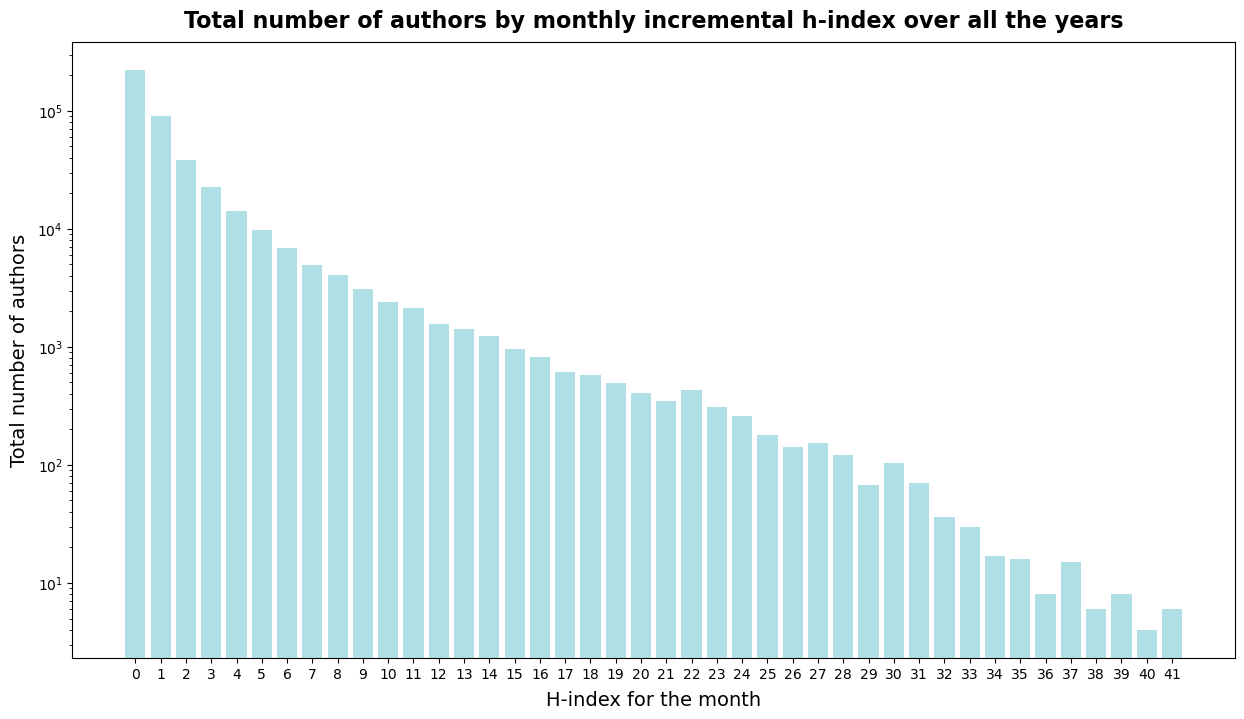

In [15]:
# lables and title specs
label_specs = {"fontsize": 14,"labelpad":6}
title_specs = {"fontsize": 16, "fontweight": "bold", "y": 1.01}


number_authors_byhindex = []
for element in listuniquevalues:
    specificlist = [x for x in mylist if x==element]
    number_authors_byhindex.append(len(specificlist))
    
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

# score bar chat
# setting the axes of our horizontal bar plot

plt.bar(listforlabel, number_authors_byhindex, color="powderblue")  
# setting the column of our dataset ('number of papers') that we want to plot as a numerical variable

# setting the labels of our axes
plt.xlabel("H-index for the month",**label_specs)
plt.ylabel("Total number of authors",**label_specs)
plt.yscale('log')

# setting the bar plot title
plt.title("Total number of authors by monthly incremental h-index over all the years",**title_specs)

# showing the bar plot (command not necessary, but it avoids to print the explanation text)
plt.show()

__Observations__

We see that there still are a lot of authors with 0 monthly h-indices, but the distribution is smoother and more balanced than in the whole dataset "dfhindices".

We now visualize in pie charts the proportion of monthly non incremental h-indices overall the years.

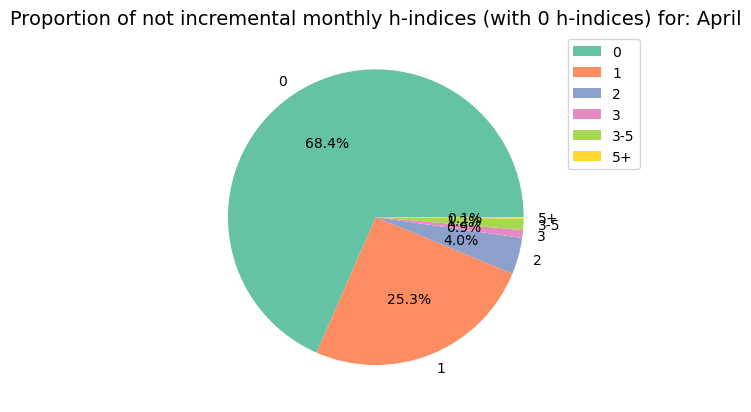

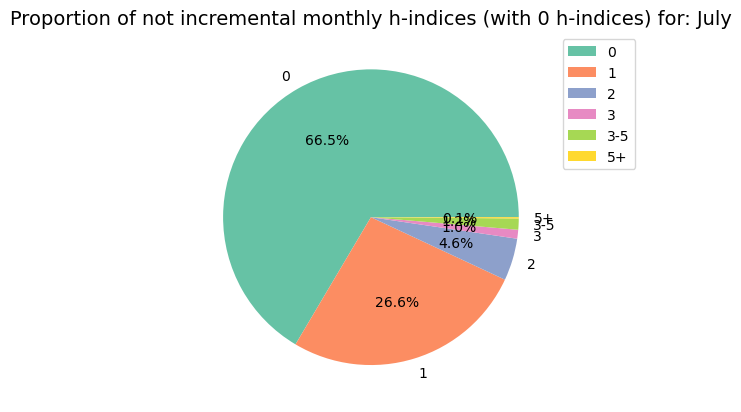

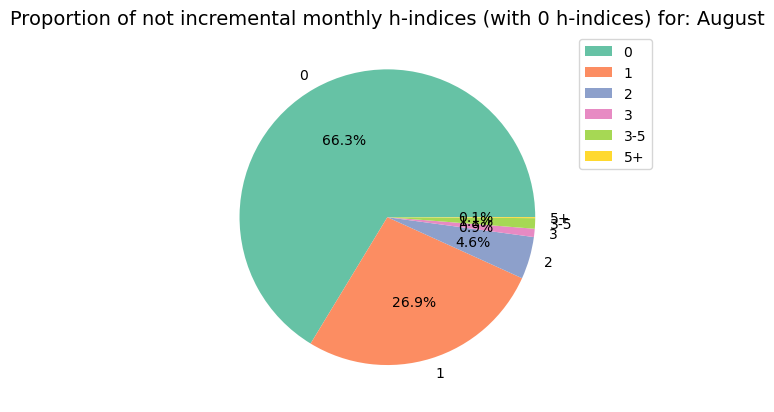

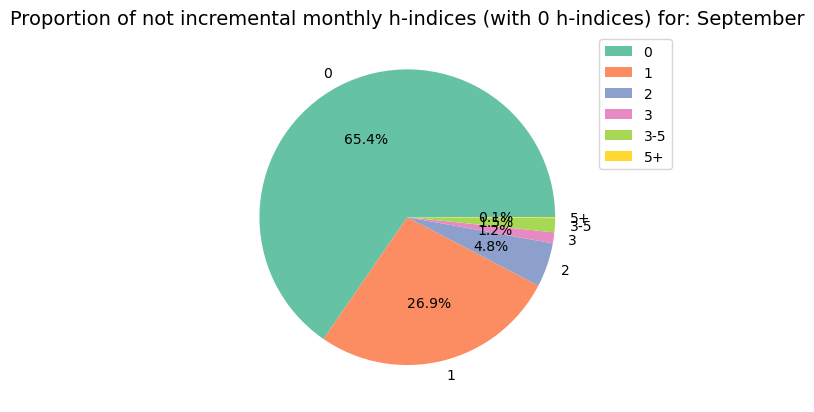

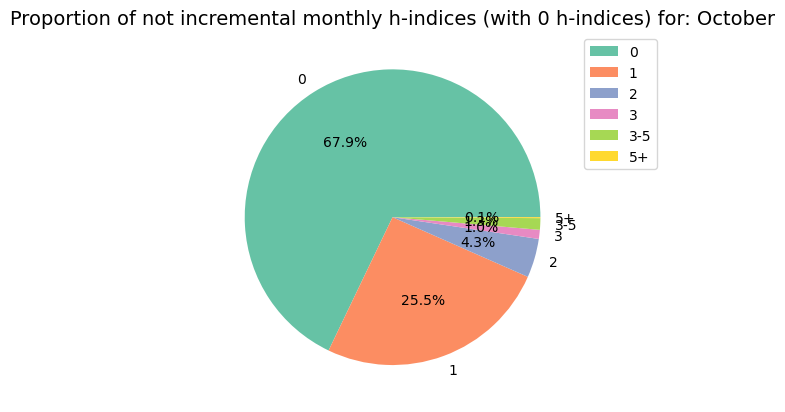

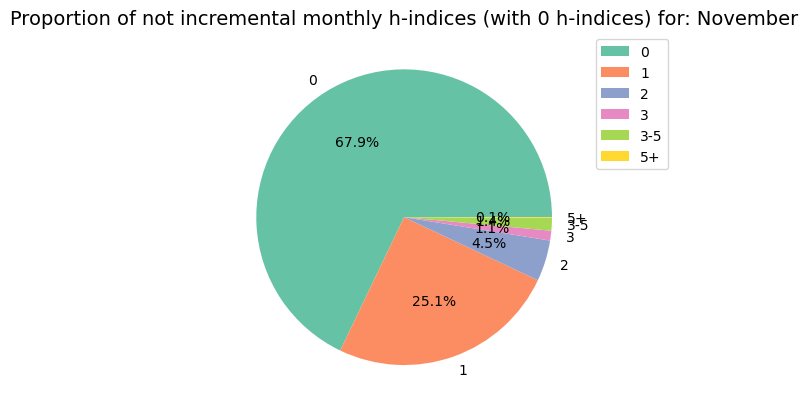

In [16]:
# little fancy visualization for df_hindices

list_indices_int = [0,1,2,3]
list_indices_range = [3,5,2000]

my_months = ['January','February','March','April','May','June','July','August','September','October','November','December']


for month in my_months:
    df = dfviz.loc[dfviz['month']==month].copy()
    h_indices_formonth = df.monthly_H_index_notincremental.tolist()
    numberauthors_hindex = []

    for i in range(4):
        specificlist=[x for x in h_indices_formonth if x==list_indices_int[i]]
        numberauthors_hindex.append(len(specificlist))

    for i in range(2):
        specificlist=[x for x in h_indices_formonth if list_indices_range[i+1]>x>=list_indices_range[i]]
        numberauthors_hindex.append(len(specificlist))
    
    # First pie chart
    # data to be displayed

    # labels for radability and intepretation
    labels1 = ["0","1", "2","3","3-5","5+"]

    # colors
    colors = sns.color_palette("Set2")

    # creating the pie chart
    plt.pie(numberauthors_hindex, labels=labels1, colors=colors, autopct="%0.1f%%")

    # title
    plt.title("Proportion of not incremental monthly h-indices (with 0 h-indices) for: "+str(month),
    color="black",  # I am using the 'white' color here, as I am using the 'dark mode' of Jupyter Lab.
    fontsize=14)

    # legend
    plt.legend(bbox_to_anchor=(1, 1))

    # calling the pie chart
    plt.show()

__Observations__

As observed above, there are much more non-zero monthly not incremental h-indices, than in the dataset "dfhindices". The distribution among the possible h-indices is more balanced, even though 99% of the monthly not incremental h-indices are below 5.

We now visualize in pie charts the proportion of monthly non incremental h-indices overall the years without the 0 indices this time.

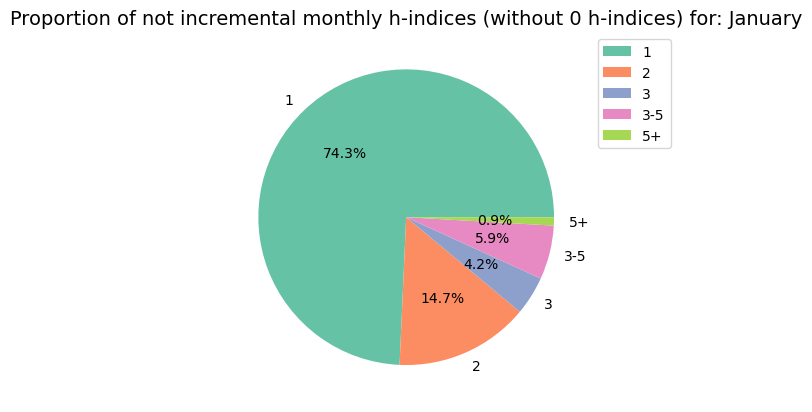

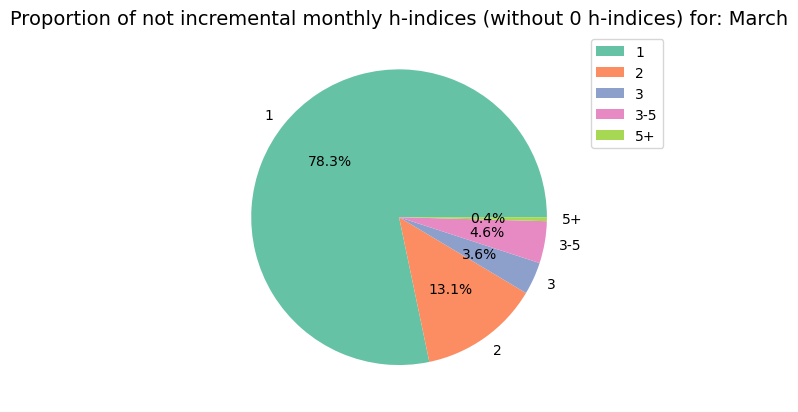

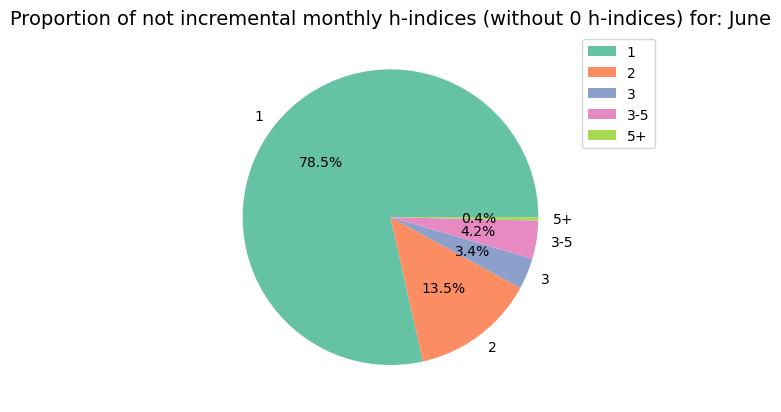

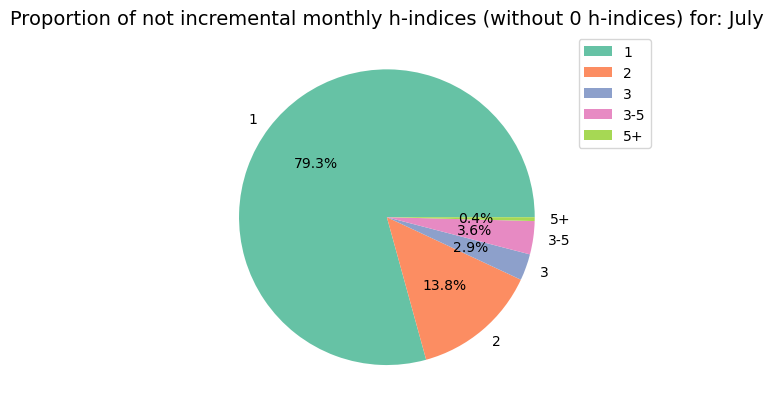

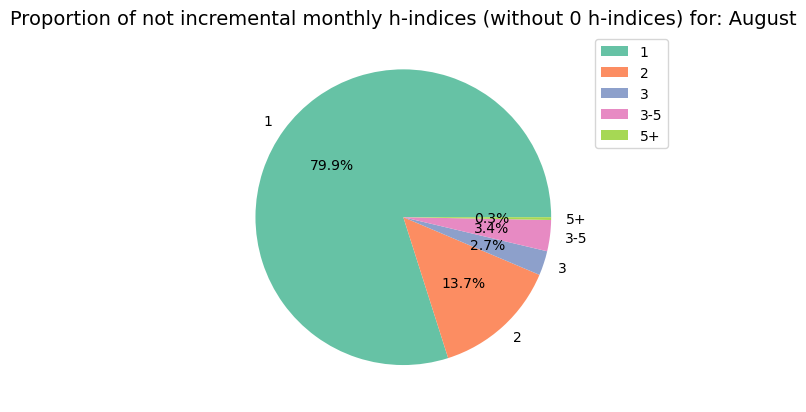

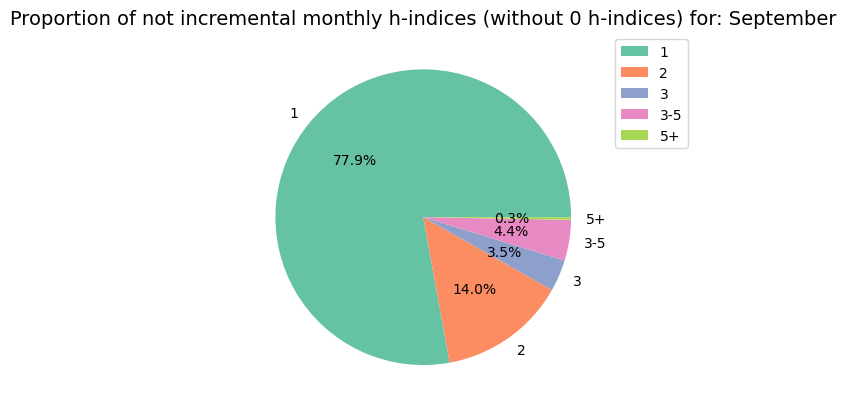

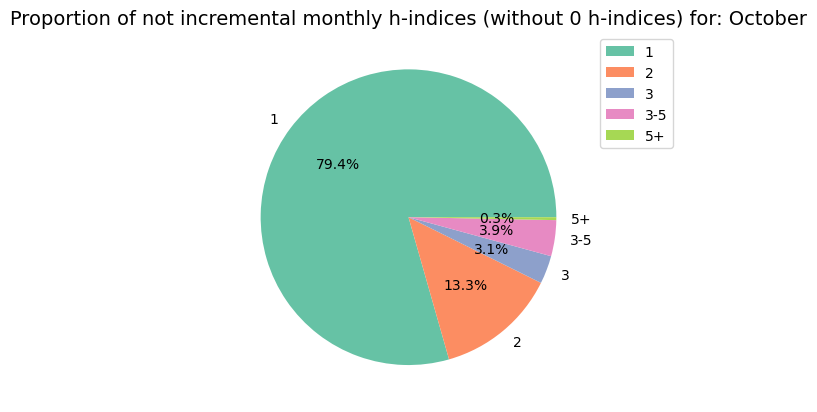

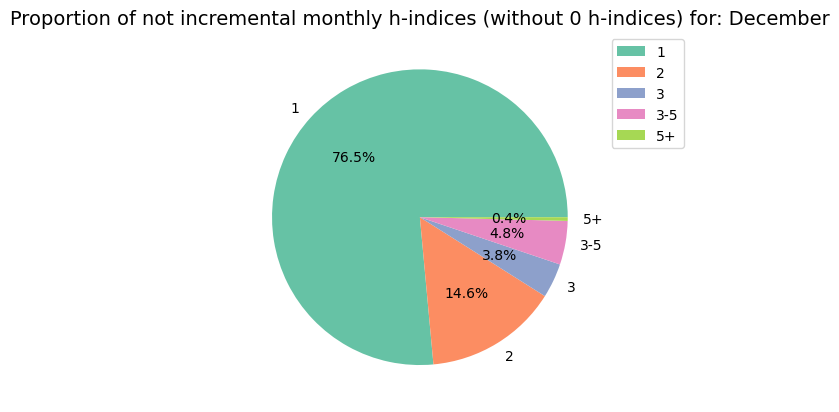

In [17]:
# little fancy visualization for df_hindices

list_indices_int = [1,2,3]
list_indices_range = [3,5,2000]

my_months = ['January','February','March','April','May','June','July','August','September','October','November','December']


for month in my_months:
    df = dfviz.loc[dfviz['month']==month].copy()
    h_indices_formonth = df.monthly_H_index_notincremental.tolist()
    numberauthors_hindex = []

    for i in range(3):
        specificlist=[x for x in h_indices_formonth if x==list_indices_int[i]]
        numberauthors_hindex.append(len(specificlist))

    for i in range(2):
        specificlist=[x for x in h_indices_formonth if list_indices_range[i+1]>x>=list_indices_range[i]]
        numberauthors_hindex.append(len(specificlist))
    
    # First pie chart
    # data to be displayed

    # labels for radability and intepretation
    labels1 = ["1", "2","3","3-5","5+"]

    # colors
    colors = sns.color_palette("Set2")
    numberauthors_hindex = [int(x) for x in numberauthors_hindex]
    # problème avec numberauthors_hindex
    
    # creating the pie chart
    plt.pie(numberauthors_hindex, labels=labels1, colors=colors, autopct="%0.1f%%")

    # title
    plt.title("Proportion of not incremental monthly h-indices (without 0 h-indices) for: "+str(month),
    color="black",  # I am using the 'white' color here, as I am using the 'dark mode' of Jupyter Lab.
    fontsize=14)

    # legend
    plt.legend(bbox_to_anchor=(1, 1))


    # calling the pie chart
    plt.show()

__Observations__

Similarly as observed above, there are much more non-zero monthly not incremental h-indices, than in the dataset "dfhindices". The distribution among the possible h-indices is more balanced, even though 99% of the monthly not incremental h-indices are below 5. Most of the non-zero monthly not incremental h-indices are one.

We now want to analyze how the yearly h-indices are distributed.

In [18]:
dfhindex_year = dfviz[['author','year','yearly_H_index_incremental','yearly_H_index_notincremental']]
dfhindex_year = dfhindex_year.drop_duplicates()

In [19]:
dfhindex_year

author  year  yearly_H_index_incremental  \
0       https://openalex.org/A2107438709  2013                         1.0   
1       https://openalex.org/A2311169168  2013                         0.0   
2       https://openalex.org/A2140477378  2013                         0.0   
3        https://openalex.org/A252575161  2013                         0.0   
4       https://openalex.org/A2017661848  2012                         1.0   
...                                  ...   ...                         ...   
431104  https://openalex.org/A2396724737  2014                         0.0   
431105  https://openalex.org/A2148140415  2014                         0.0   
431107  https://openalex.org/A2134580343  2011                         0.0   
431109  https://openalex.org/A2091883170  2011                         0.0   
431112  https://openalex.org/A2210425818  2013                         0.0   

        yearly_H_index_notincremental  
0                                 1.0  
1                                 0.0  
2                                 0.0  
3                                 0.0  
4                                 1.0  
...                               ...  
431104                            0.0  
431105                            0.0  
431107                            0.0  
431109                            0.0  
431112                            0.0  

[306159 rows x 4 columns]

In [20]:
list_yearly_H_index_incremental =dfhindex_year.yearly_H_index_incremental.tolist()
list_yearly_H_index_notincremental =dfhindex_year.yearly_H_index_notincremental.tolist()

We count how many times each yearly h-index occurs in my dataset.

In [21]:
freqncyDictionary_1 = Counter(list_yearly_H_index_incremental)
freqncyDictionary_1

Counter({1.0: 72306,
         0.0: 178627,
         3.0: 11611,
         4.0: 6386,
         9.0: 905,
         2.0: 23575,
         15.0: 204,
         21.0: 57,
         5.0: 4049,
         19.0: 78,
         8.0: 1209,
         10.0: 632,
         20.0: 64,
         22.0: 48,
         7.0: 1750,
         11.0: 547,
         13.0: 341,
         12.0: 369,
         16.0: 157,
         6.0: 2491,
         14.0: 282,
         24.0: 40,
         17.0: 121,
         18.0: 102,
         23.0: 42,
         27.0: 17,
         28.0: 20,
         32.0: 6,
         25.0: 32,
         26.0: 23,
         33.0: 8,
         30.0: 12,
         29.0: 14,
         36.0: 3,
         34.0: 4,
         35.0: 4,
         31.0: 12,
         38.0: 2,
         39.0: 3,
         37.0: 2,
         40.0: 2,
         42.0: 1,
         41.0: 1})

In [22]:
freqncyDictionary_2 = Counter(list_yearly_H_index_notincremental)
freqncyDictionary_2

Counter({1.0: 79096,
         0.0: 191597,
         2.0: 20529,
         4.0: 3381,
         3.0: 7664,
         11.0: 81,
         15.0: 15,
         9.0: 175,
         5.0: 1683,
         13.0: 28,
         14.0: 20,
         6.0: 879,
         8.0: 303,
         7.0: 507,
         12.0: 51,
         16.0: 8,
         10.0: 132,
         18.0: 2,
         17.0: 4,
         21.0: 1,
         23.0: 1,
         19.0: 2})

I now create the lists, I will use to visualize the distribution of the yearly h-indices in bar charts.

In [23]:
my_years = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

list_indices_int = [0,1,2,3]
list_indices_range = [3,5,7,10,15,25,40,2000]

numberauthors_byh_index_incremental_allyears=[]
numberauthors_byh_index_fortheyear_allyears = []

for year in tqdm(my_years):
    
    # I first create the data I will use
    
    numberauthors_byh_index_incremental = []
    numberauthors_byh_index_fortheyear = []
    
    myinfo_year = dfhindex_year.loc[dfhindex_year['year']==year]
    my_h_indices = myinfo_year.yearly_H_index_incremental.tolist() 
    my_h_indices_fortheyear = myinfo_year.yearly_H_index_notincremental.tolist()
    
    # we take all the yearly hindex incremental
    # for each year we have 12 such these h indices that are
    # all the same. So we want to take each h index only once.

    for i in range(4):
        specificlist=[x for x in my_h_indices if x==list_indices_int[i]]
        numberauthors_byh_index_incremental.append(len(specificlist))
        
        specificlist_fortheyear=[x for x in my_h_indices_fortheyear if x==list_indices_int[i]]
        numberauthors_byh_index_fortheyear.append(len(specificlist_fortheyear))
    for i in range(7):
        specificlist=[x for x in my_h_indices if list_indices_range[i+1]>x>=list_indices_range[i]]
        numberauthors_byh_index_incremental.append(len(specificlist))
        specificlist_fortheyear=[x for x in my_h_indices_fortheyear if list_indices_range[i+1]>x>=list_indices_range[i]]
        numberauthors_byh_index_fortheyear.append(len(specificlist_fortheyear))
        
    numberauthors_byh_index_incremental_allyears.append(numberauthors_byh_index_incremental)
    numberauthors_byh_index_fortheyear_allyears.append(numberauthors_byh_index_fortheyear)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 18.01it/s]


I visualize my bar charts for each year.

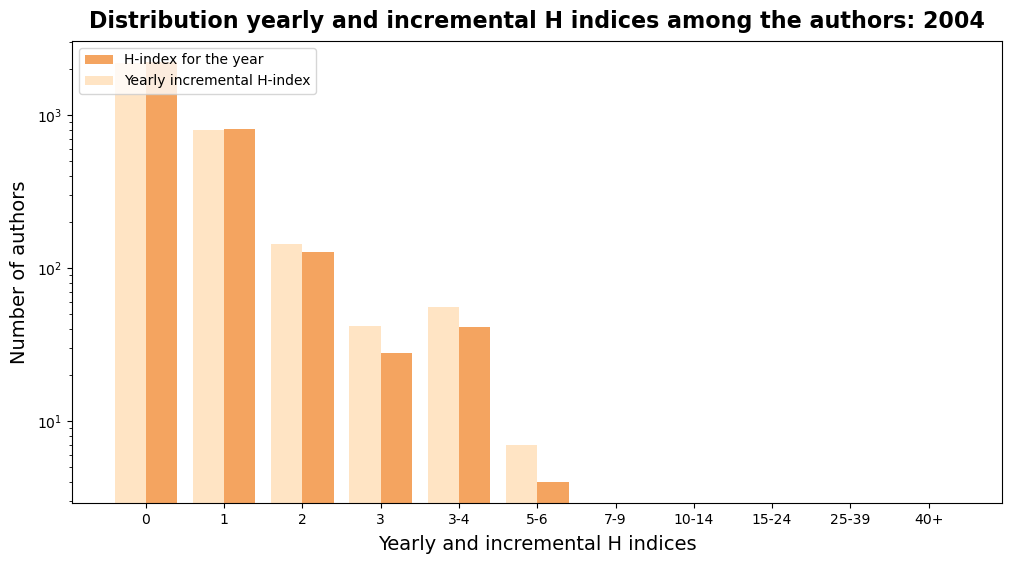

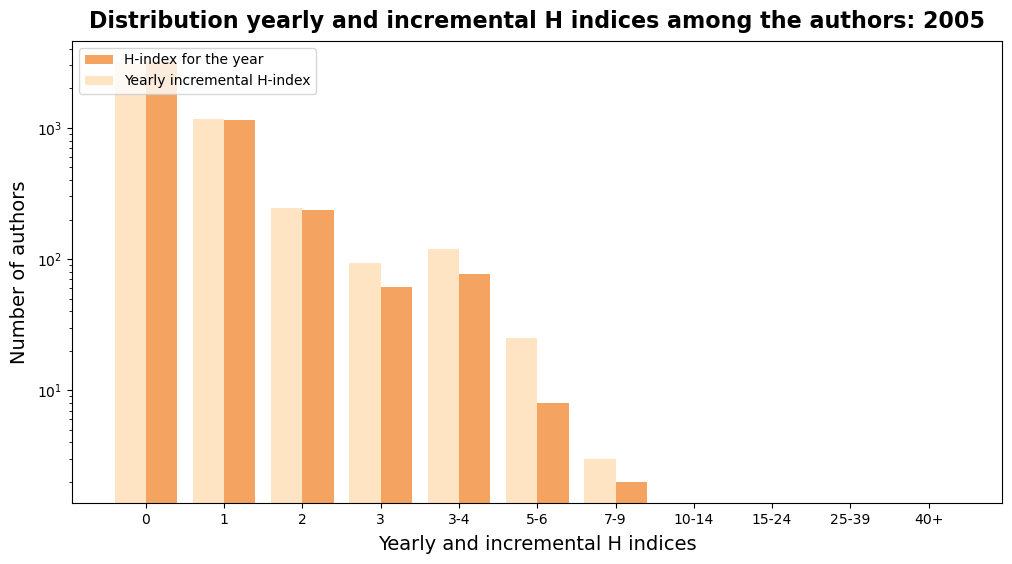

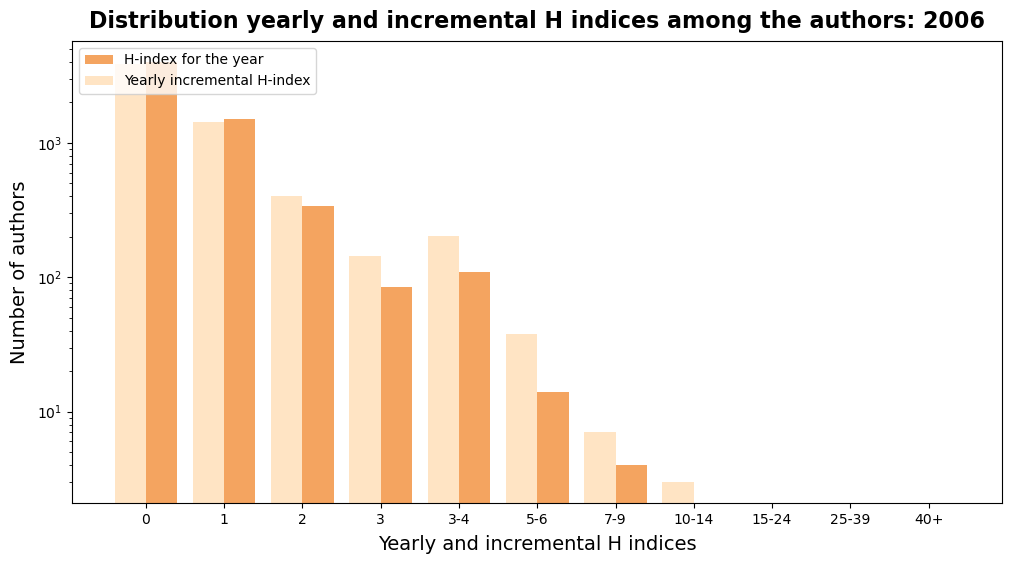

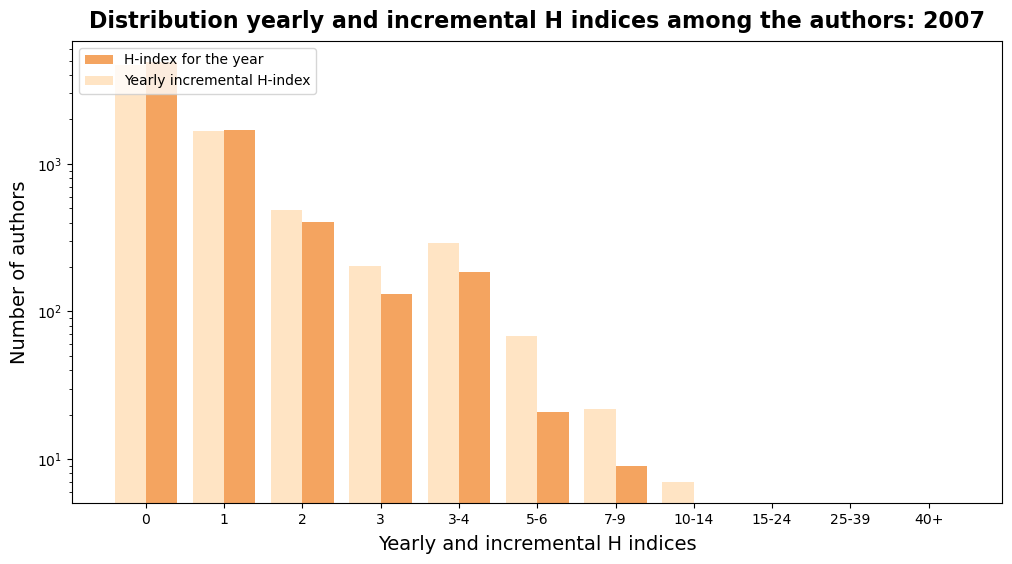

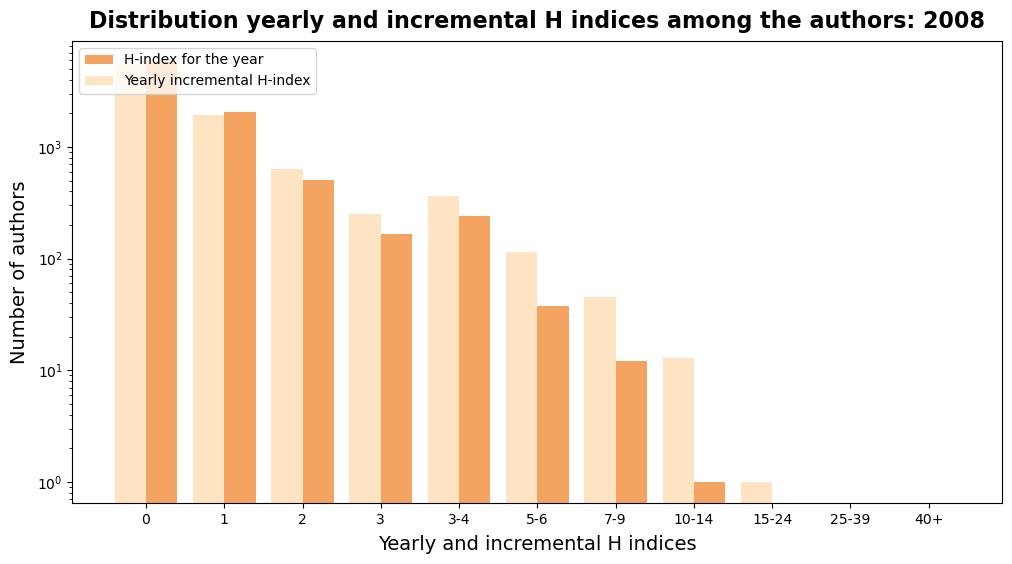

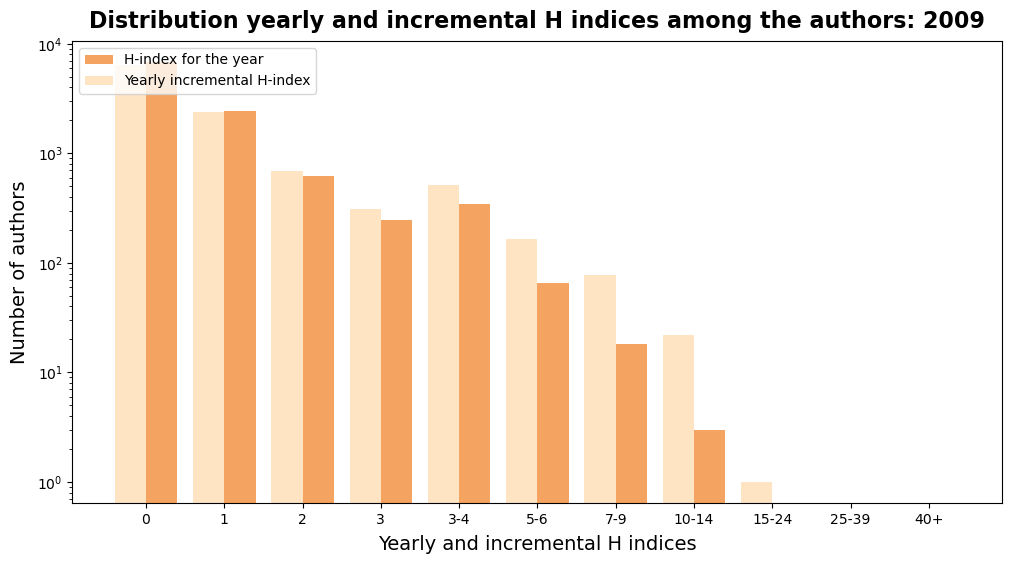

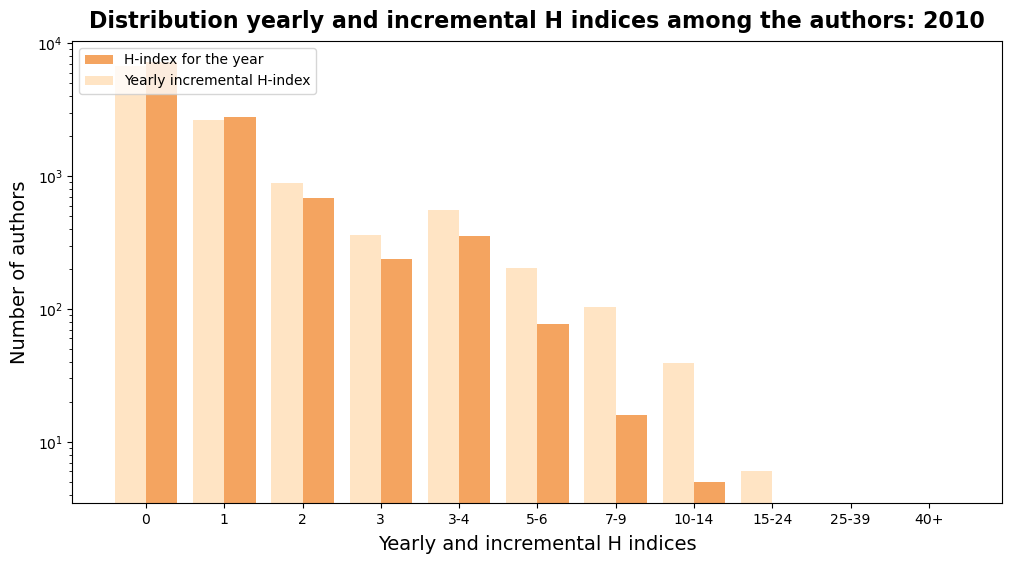

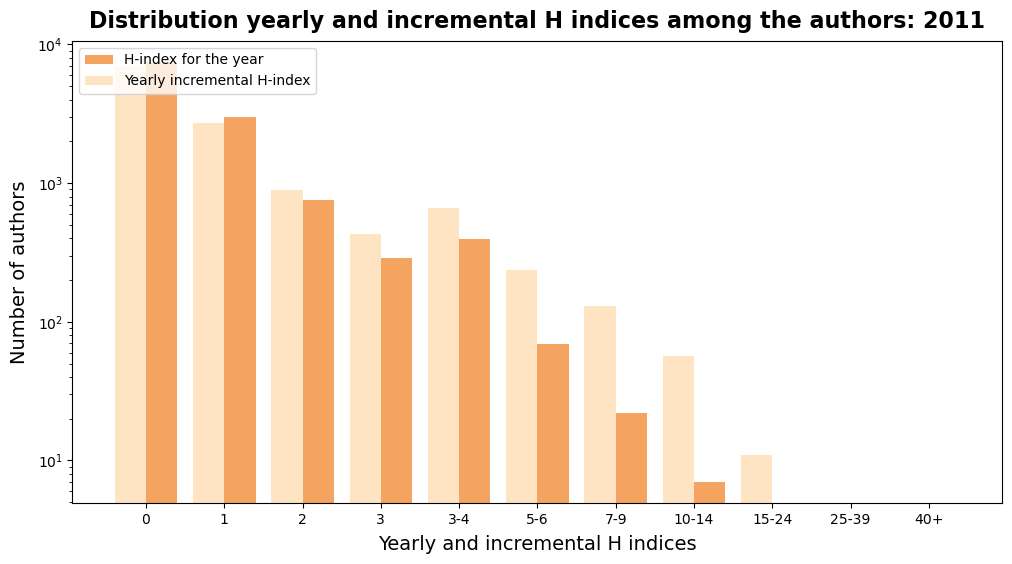

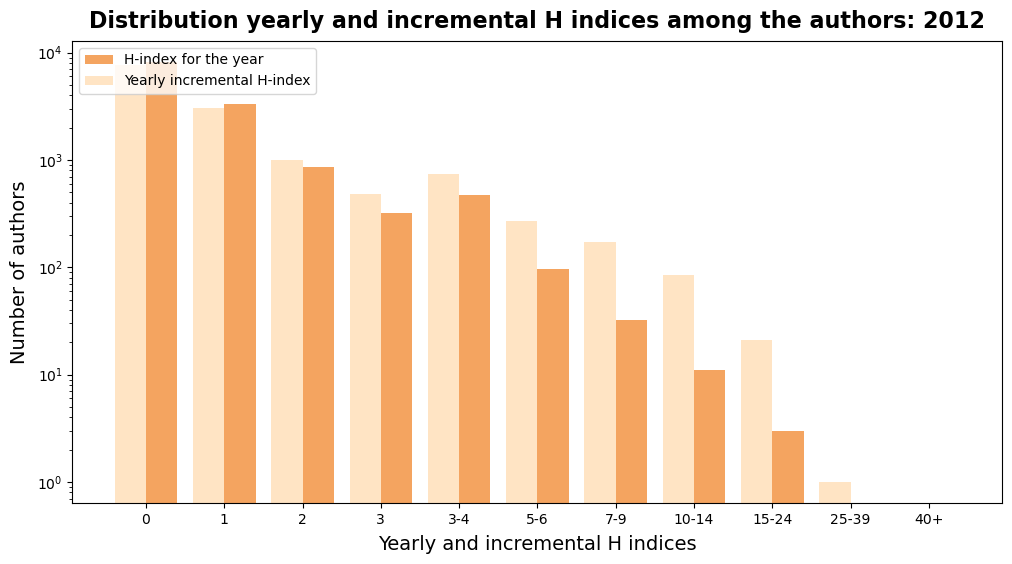

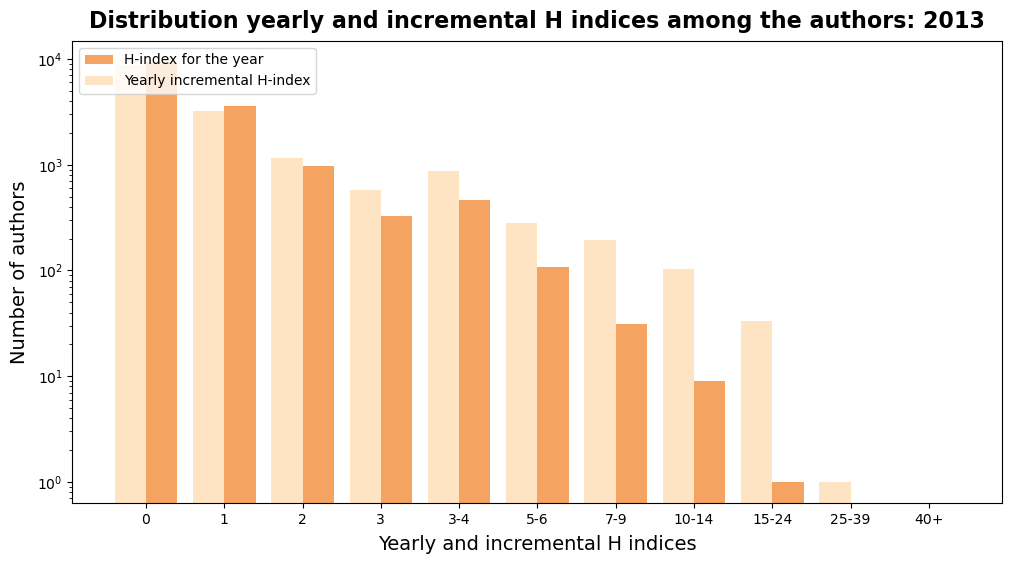

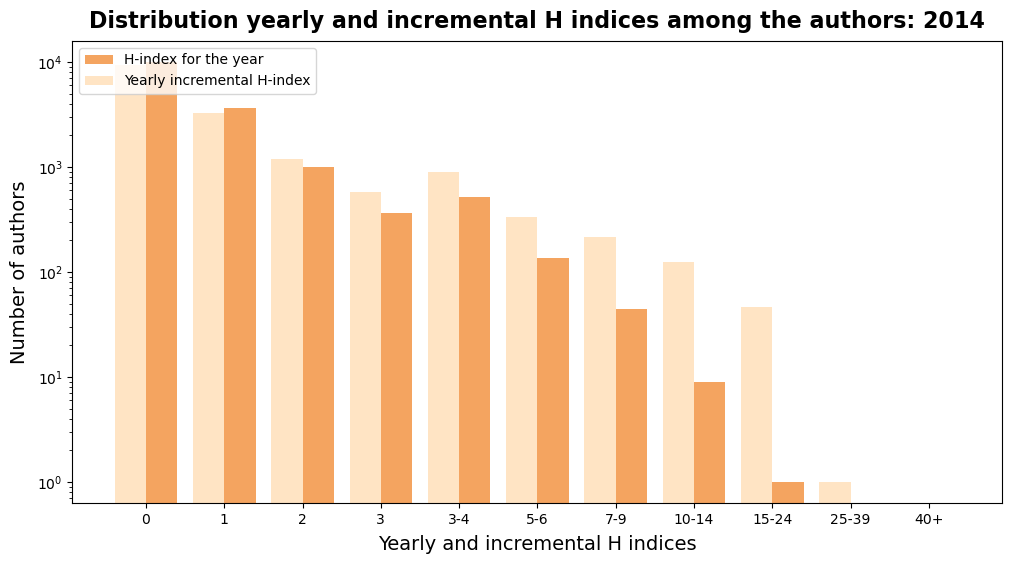

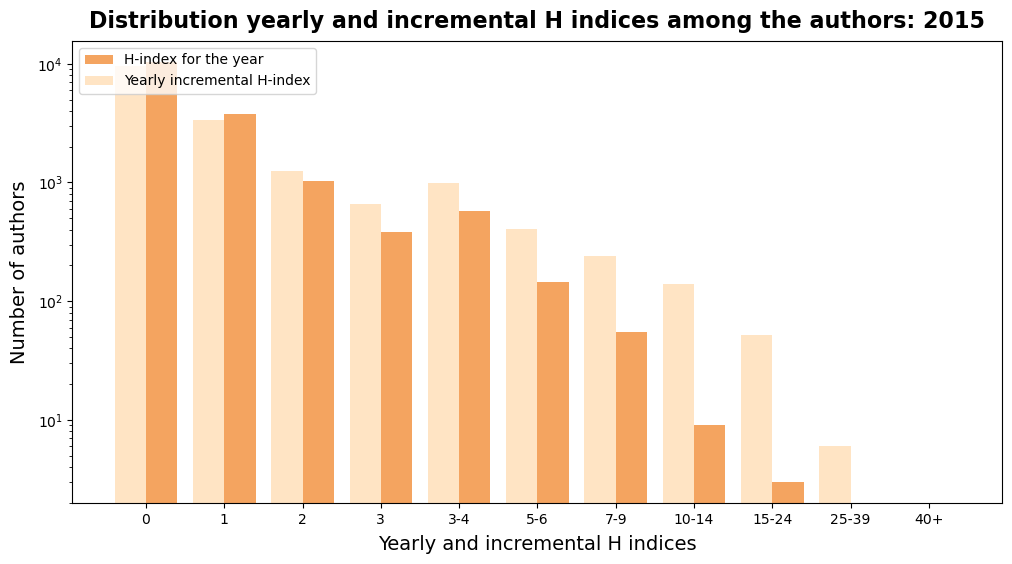

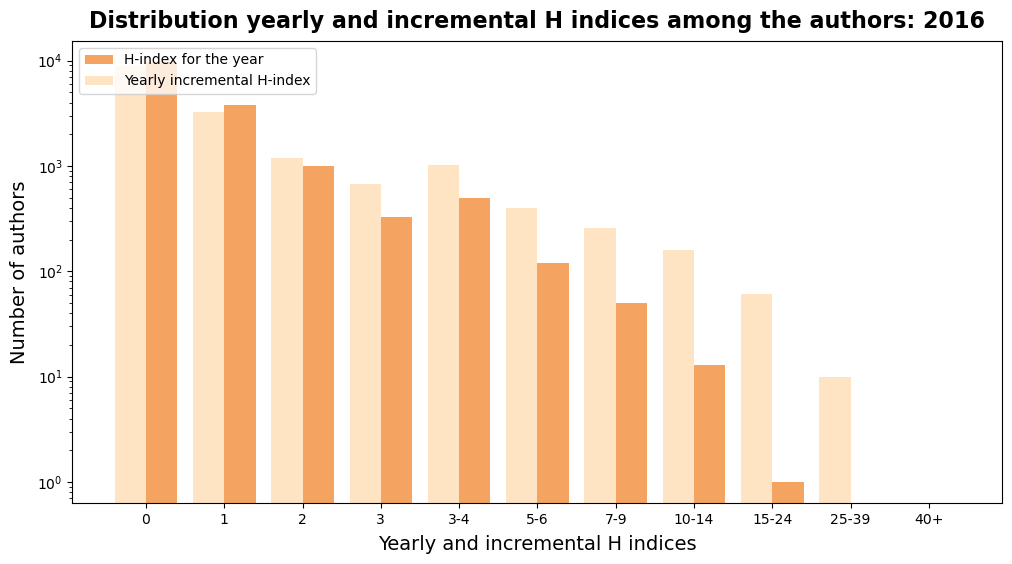

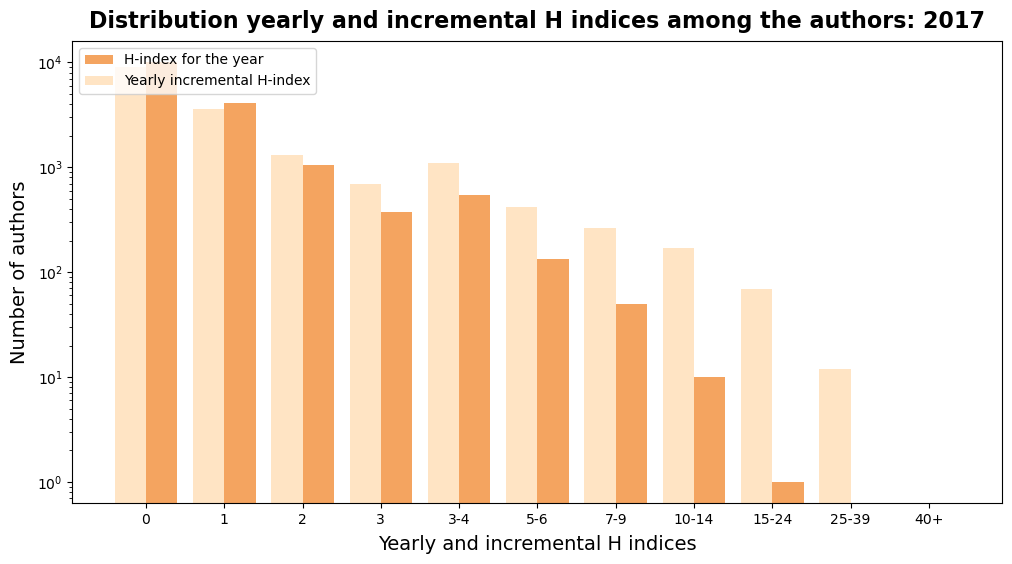

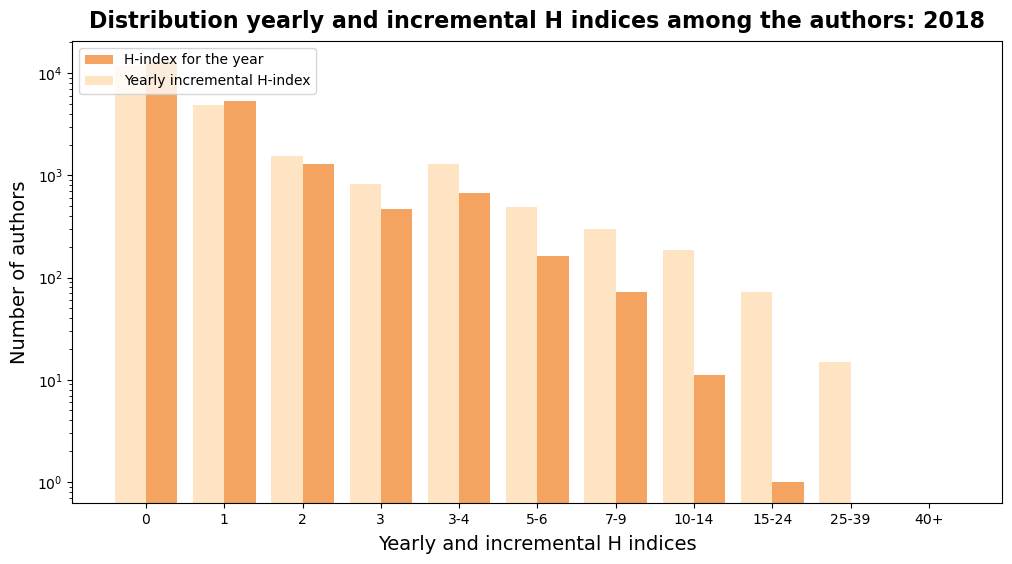

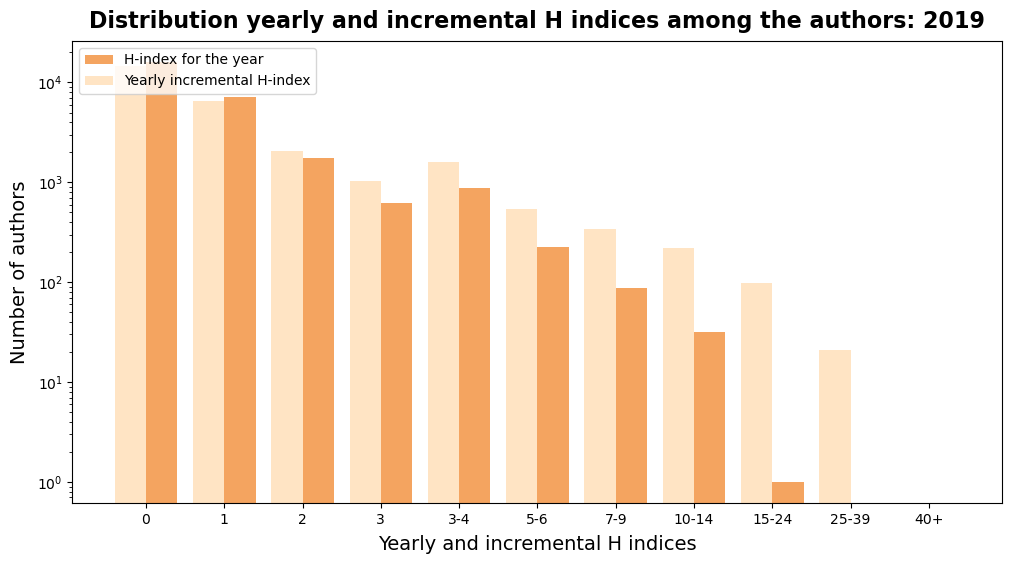

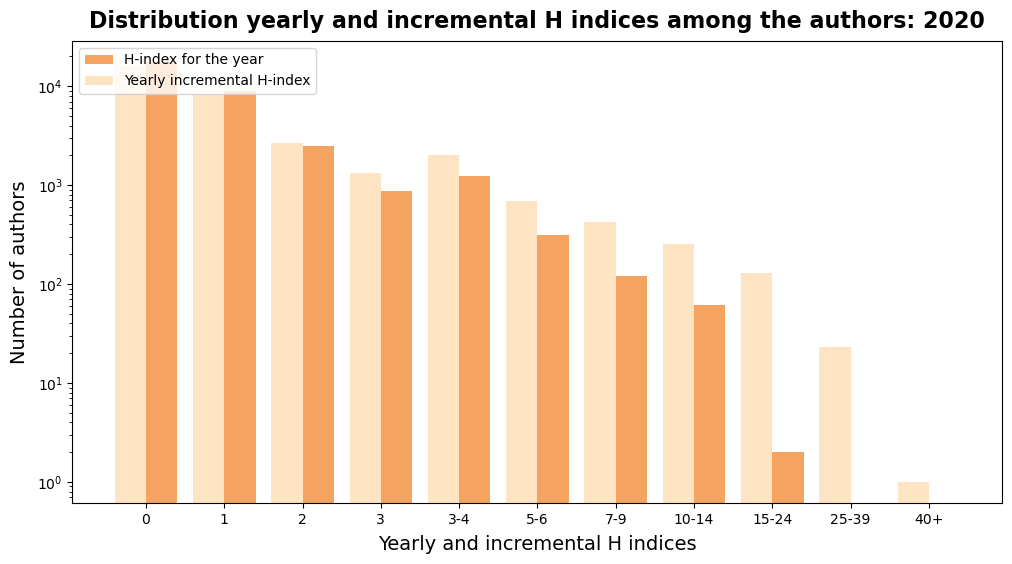

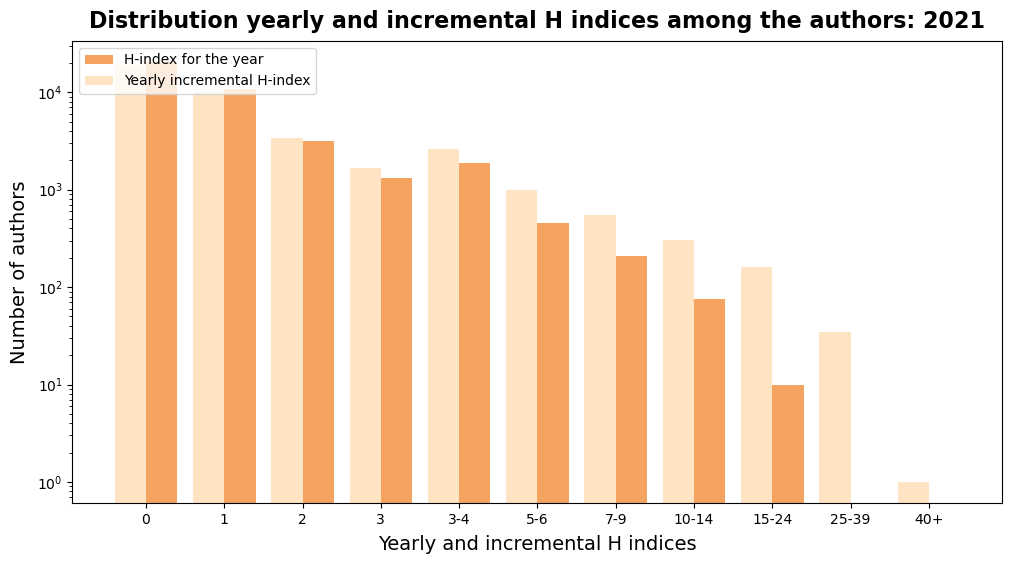

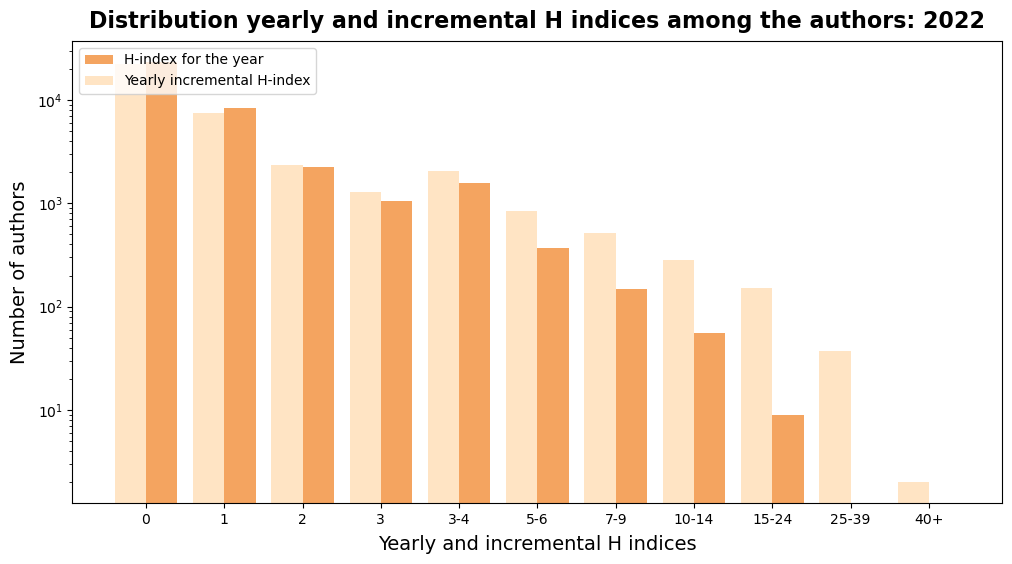

In [24]:
my_years = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

# lables and title specs
label_specs = {"fontsize": 14,"labelpad":6}
title_specs = {"fontsize": 16, "fontweight": "bold", "y": 1.01}

# We visualize the number of papers with non-zero score of attribution to technologies

list_indices_int = [0,1,2,3]
list_indices_range = [3,5,7,10,15,25,40,2000]

for year in my_years:
    
    # I first create the data I will use
        
    # Now I visualize it      
        
    width = 0.4 
    first_label = 'H-index for the year'
    first_bar_color = 'sandybrown'
    second_label = 'Yearly incremental H-index'
    second_bar_color = 'bisque'
    
    label = ['H-index for the year','Yearly incremental H-index']
    
    
    index=my_years.index(year)
    
    fig = plt.subplots(figsize=(12,6))
    
    x_cor = np.arange(0,11,1)
    plt.bar(x_cor + width/2, numberauthors_byh_index_fortheyear_allyears[index], width, label=first_label, color=first_bar_color)
    plt.bar(x_cor - width/2, numberauthors_byh_index_incremental_allyears[index], width, label=second_label, color=second_bar_color) 
    
    # setting the axes of our horizontal bar plot
    x_label = ['0','1','2','3','3-4','5-6','7-9','10-14','15-24','25-39','40+'] 
    
    
    # setting the labels of our axes
    plt.xlabel("Yearly and incremental H indices",**label_specs)
    plt.ylabel("Number of authors",**label_specs)
    plt.yscale('log')
    
    plt.legend(label,loc=2)

    # setting how we want our label ticks
    plt.xticks(x_cor, x_label)

    # setting the bar plot title
    plt.title("Distribution yearly and incremental H indices among the authors: "+str(year),**title_specs)

    # showing the bar plot (command not necessary, but it avoids to print the explanation text)
    plt.show()

__Observation__

We can see that h-index for the year just as the yearly incremental h-index increases with time. This is due to the increase of interconnectivity within the field of encryption technologies. Besides, the number of high incremental yearly h-indices becomes bigger than the number of high not incremental yearly h-indices just as expected.

__1.3) Correlation analysis of the dataset__

We first need to change the types of our variables.

In [25]:
infile_df_full_extended = open('data_exploratory_analysis/df_full_extended','rb')
df_full_extended = pickle.load(infile_df_full_extended)
infile_df_full_extended.close()

In [26]:
my_months = ['January','February','March','April','May','June','July','August','September','October','November','December']

cat_dtype = CategoricalDtype(categories=my_months, ordered=True)

df_full_extended['month']=df_full_extended['month'].astype(cat_dtype)

In [27]:
df_full_extended['cosine_similarity']=df_full_extended['cosine_similarity'].astype(float)
df_full_extended['score_concepts']=df_full_extended['score_concepts'].astype(float)

In [28]:
df_full_extended.dtypes

paper                               object
keyword                             object
cosine_similarity                  float64
title                               object
publication_date                    object
abstract                            object
year                                 int64
month                             category
author                              object
referenced_works                    object
concepts                            object
score_concepts                     float64
yearly_H_index_notincremental      float64
yearly_H_index_incremental         float64
monthly_H_index_incremental        float64
monthly_H_index_notincremental     float64
dtype: object

Now we can visualize several information using heatmaps, just as usual. We do not analyze ```score_concepts``` and ```cosine_similarity``` again since this was already done before in previous analyses. We only consider the different h-indices, that might be very different this time, since we only have these information for the moment when authors published papers.

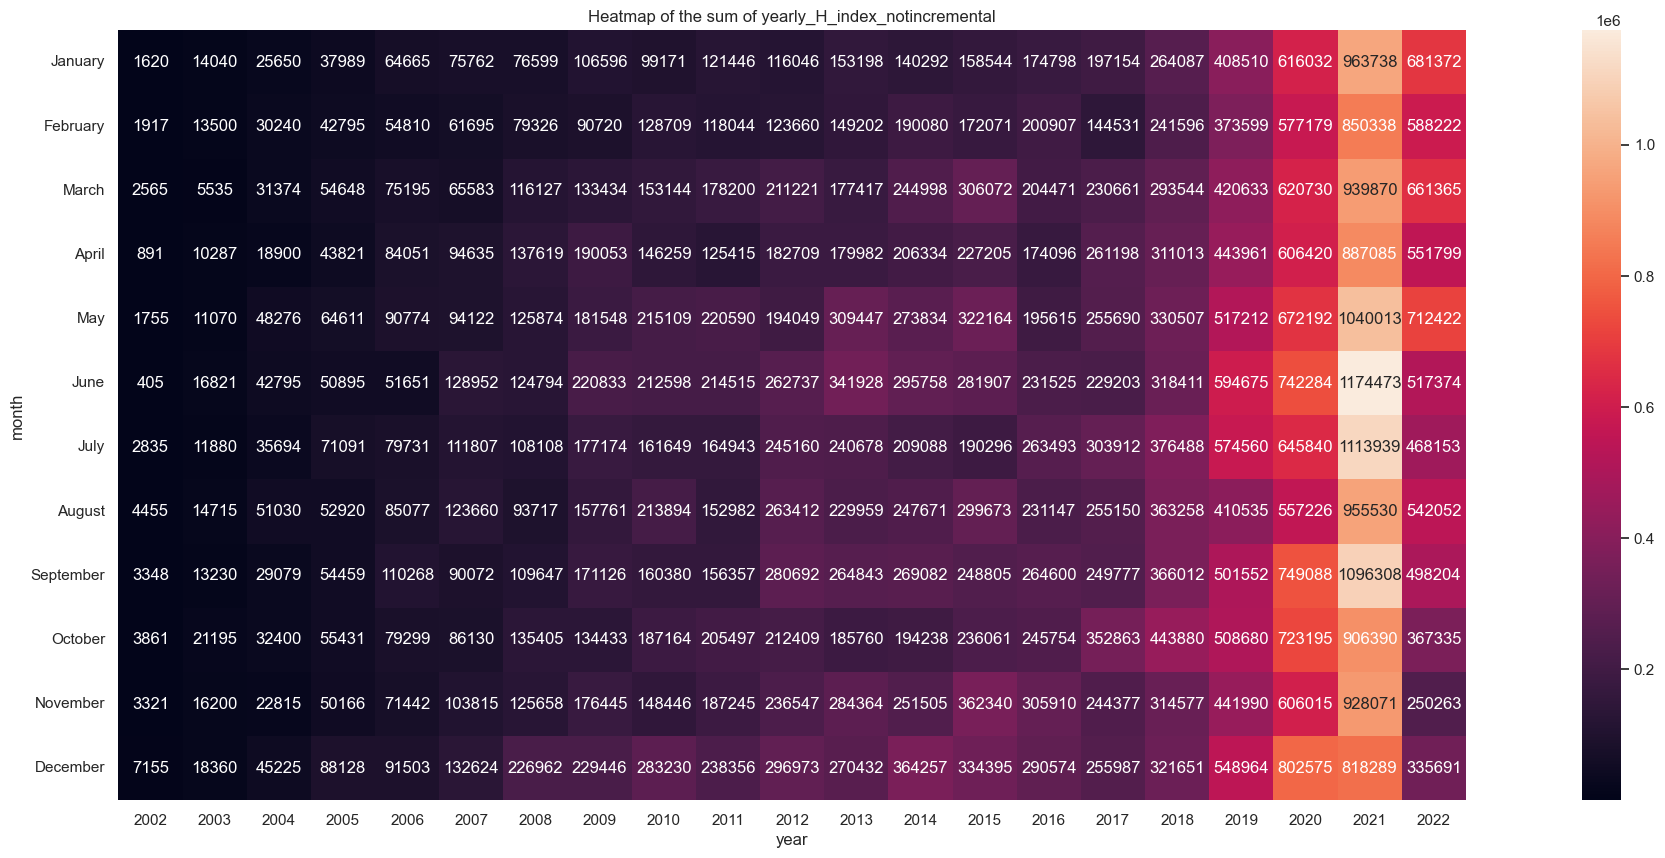

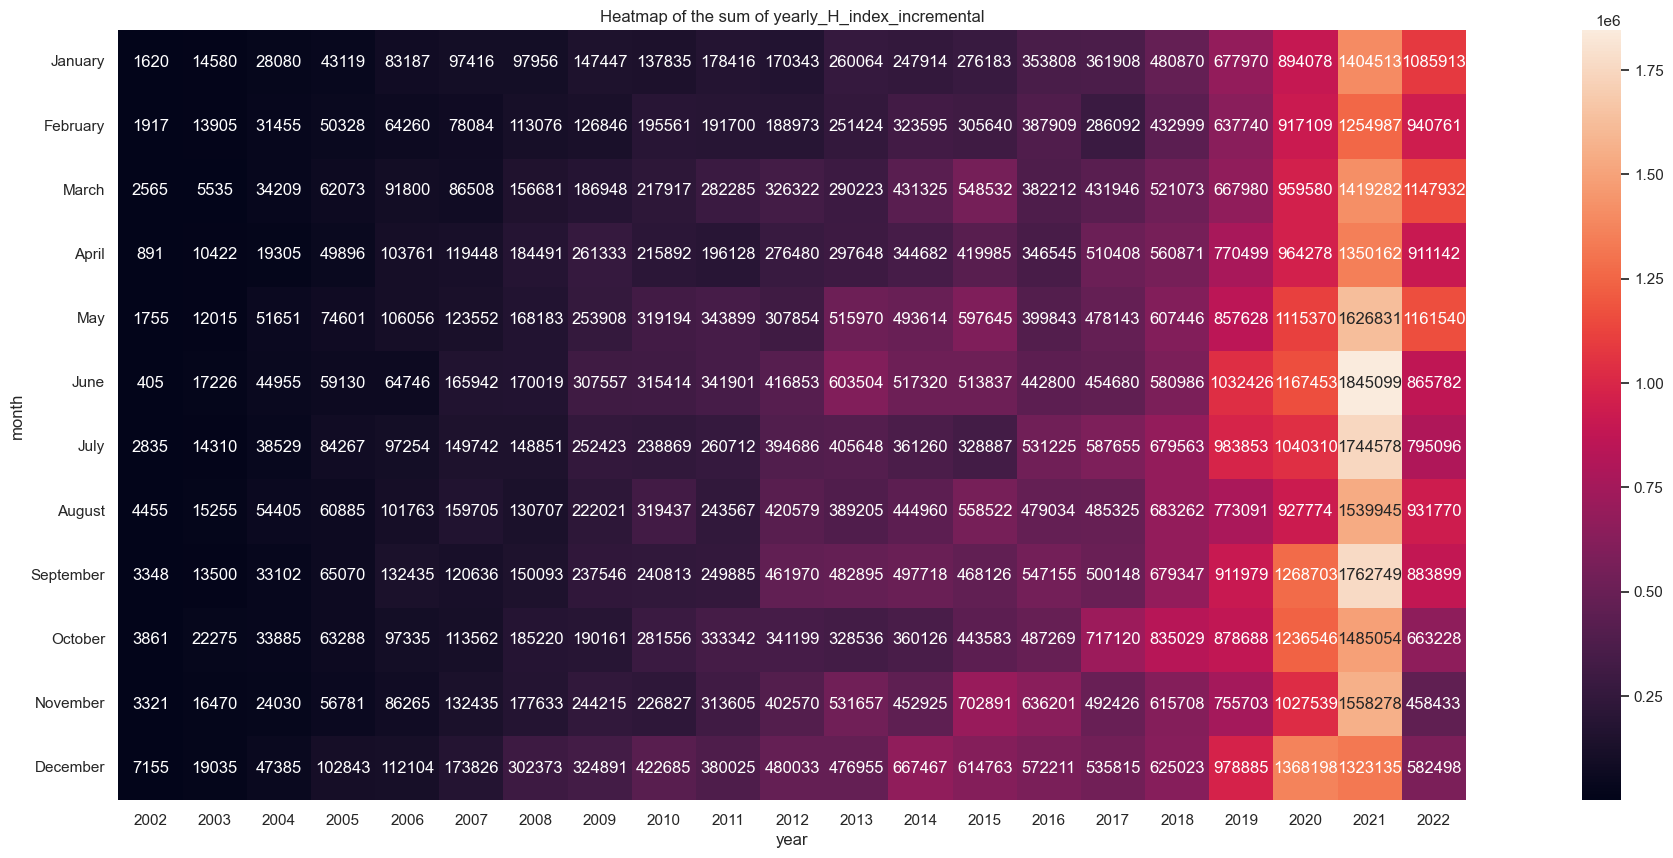

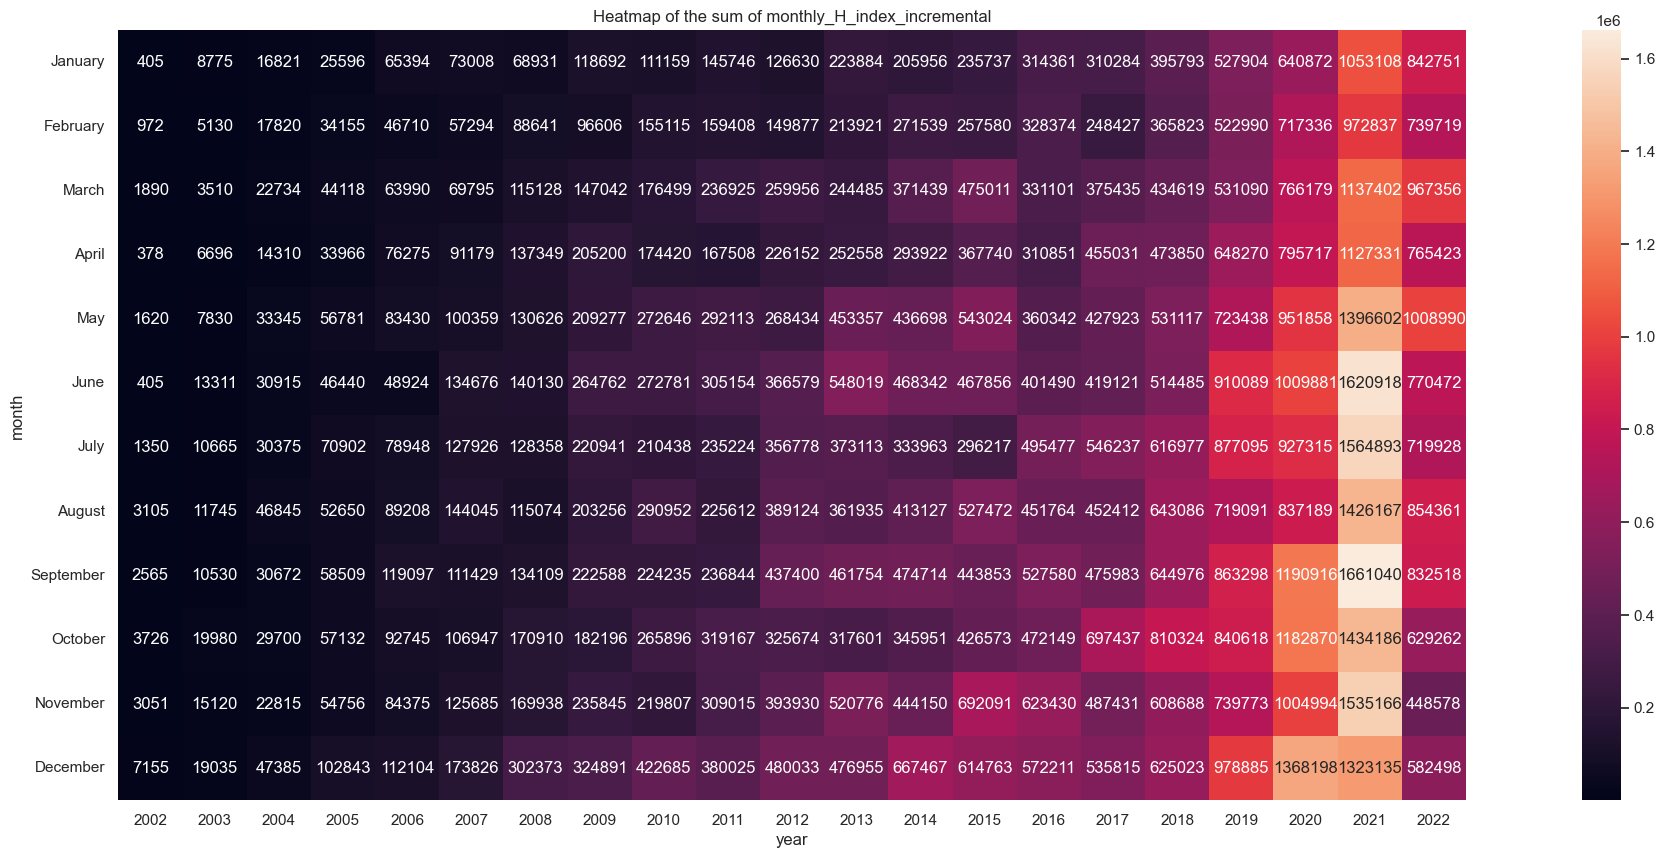

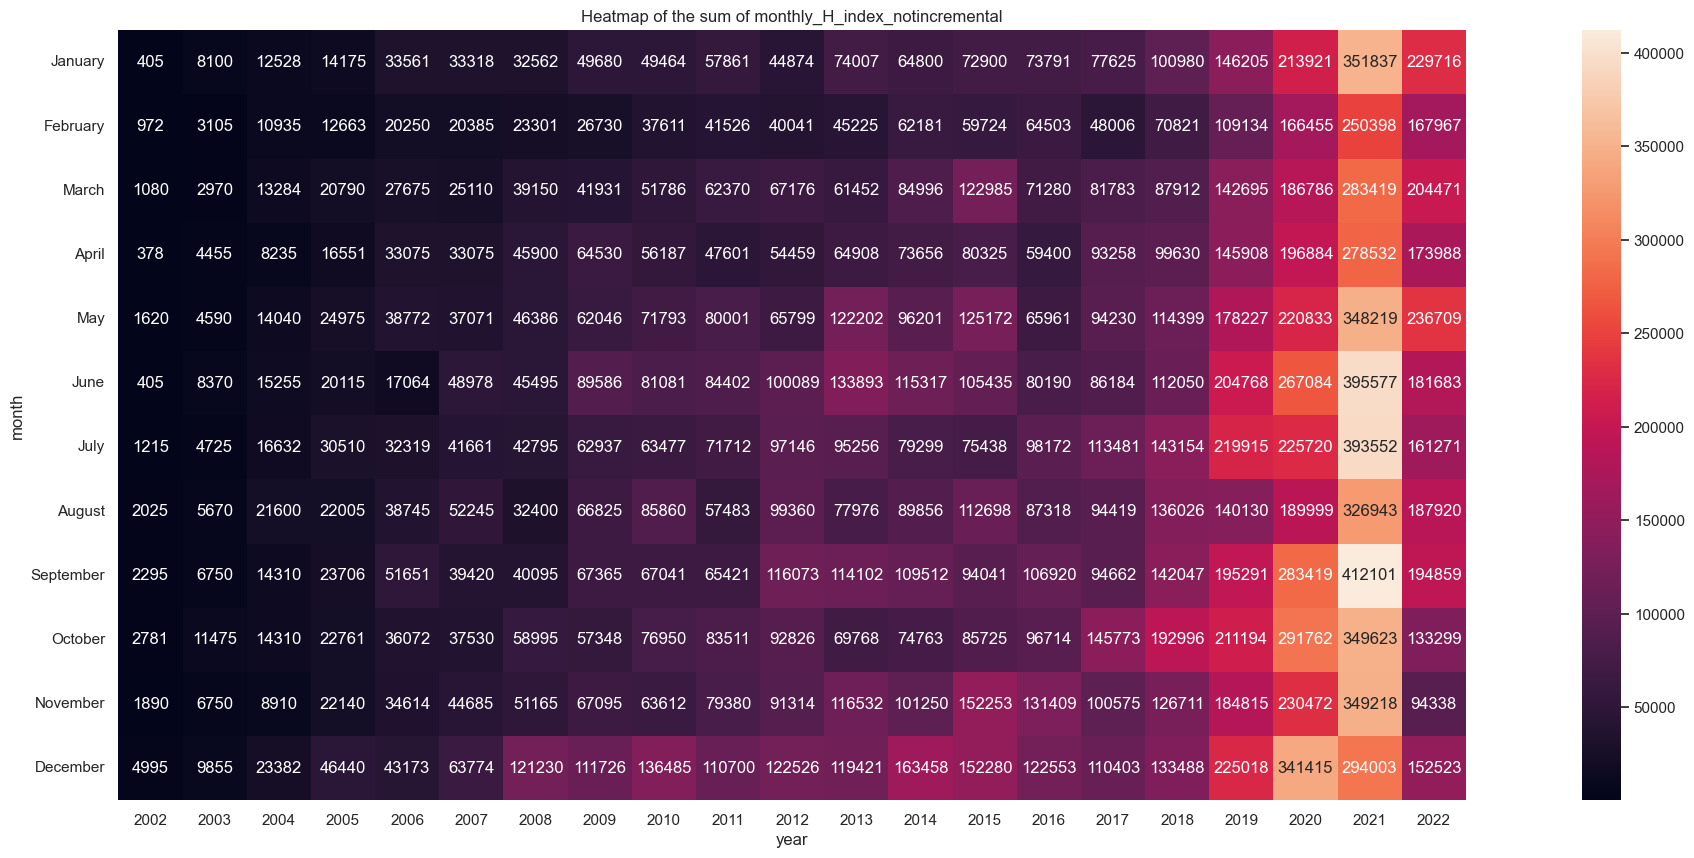

In [29]:
for column in ['yearly_H_index_notincremental','yearly_H_index_incremental','monthly_H_index_incremental','monthly_H_index_notincremental']:
    heatmap_data = pd.pivot_table(
    df_full_extended, values=column, index="month", columns="year", aggfunc=np.sum
    )

    sns.set(rc={"figure.figsize": (30, 10)})
    sns.heatmap(heatmap_data, annot=True, square=True, fmt=".0f").set(
    title="Heatmap of the sum of "+str(column)
    )
    plt.show()

__Observations__

Just as expected, there is an increase of the number and the dimension of all h-indices with time that we see through the increase of the sum of the h-indices. The last year is a bit an exception, but this is just due to the fact, that we do not have all the data for 2022.

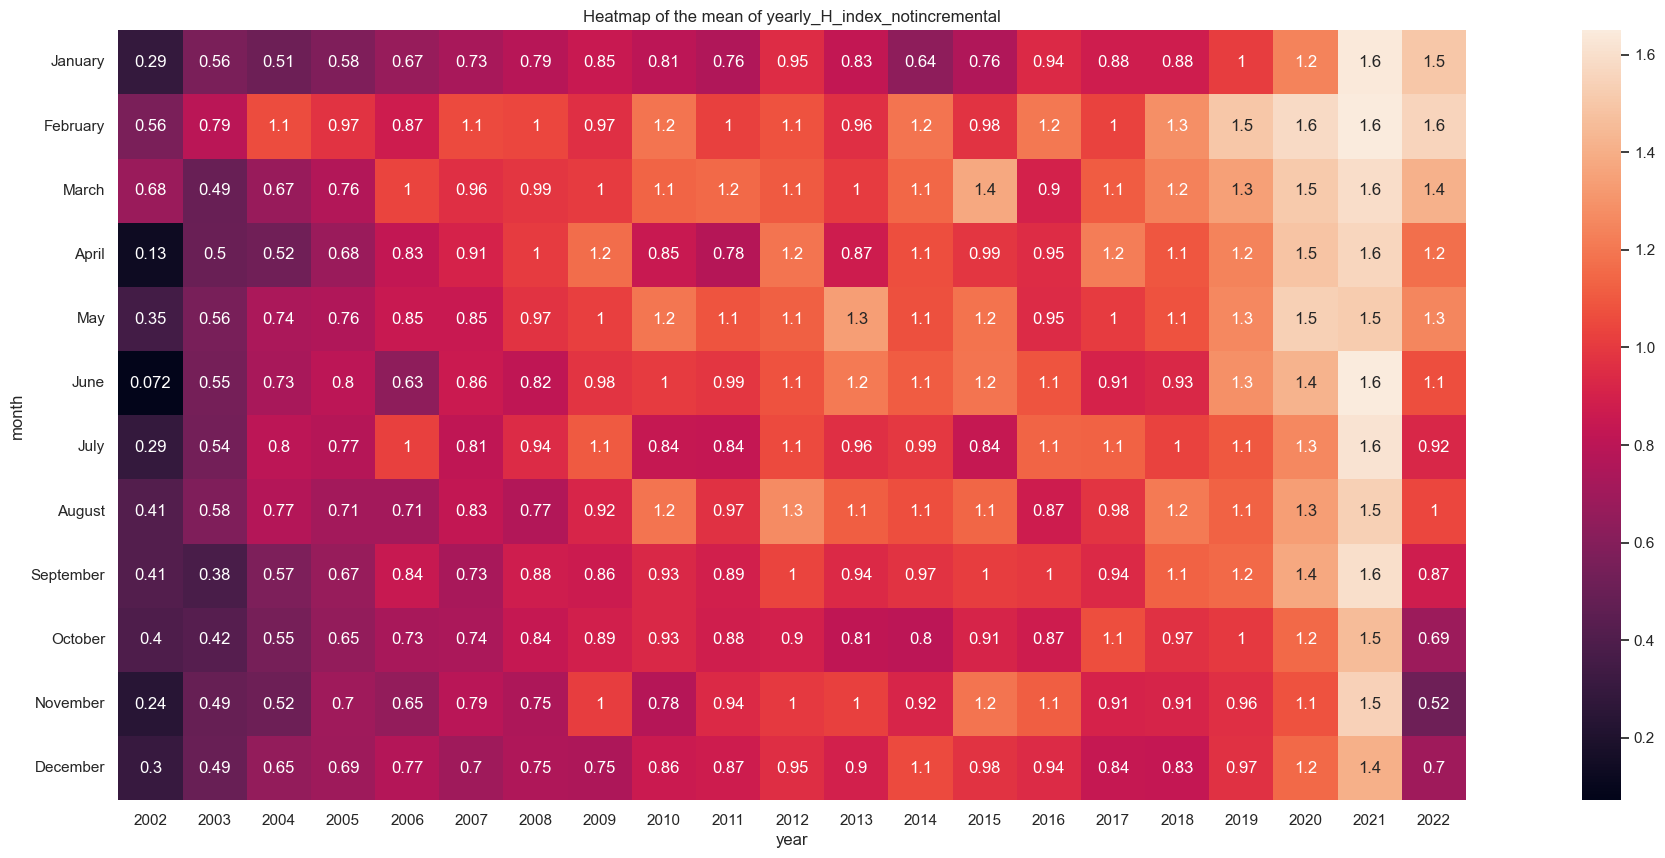

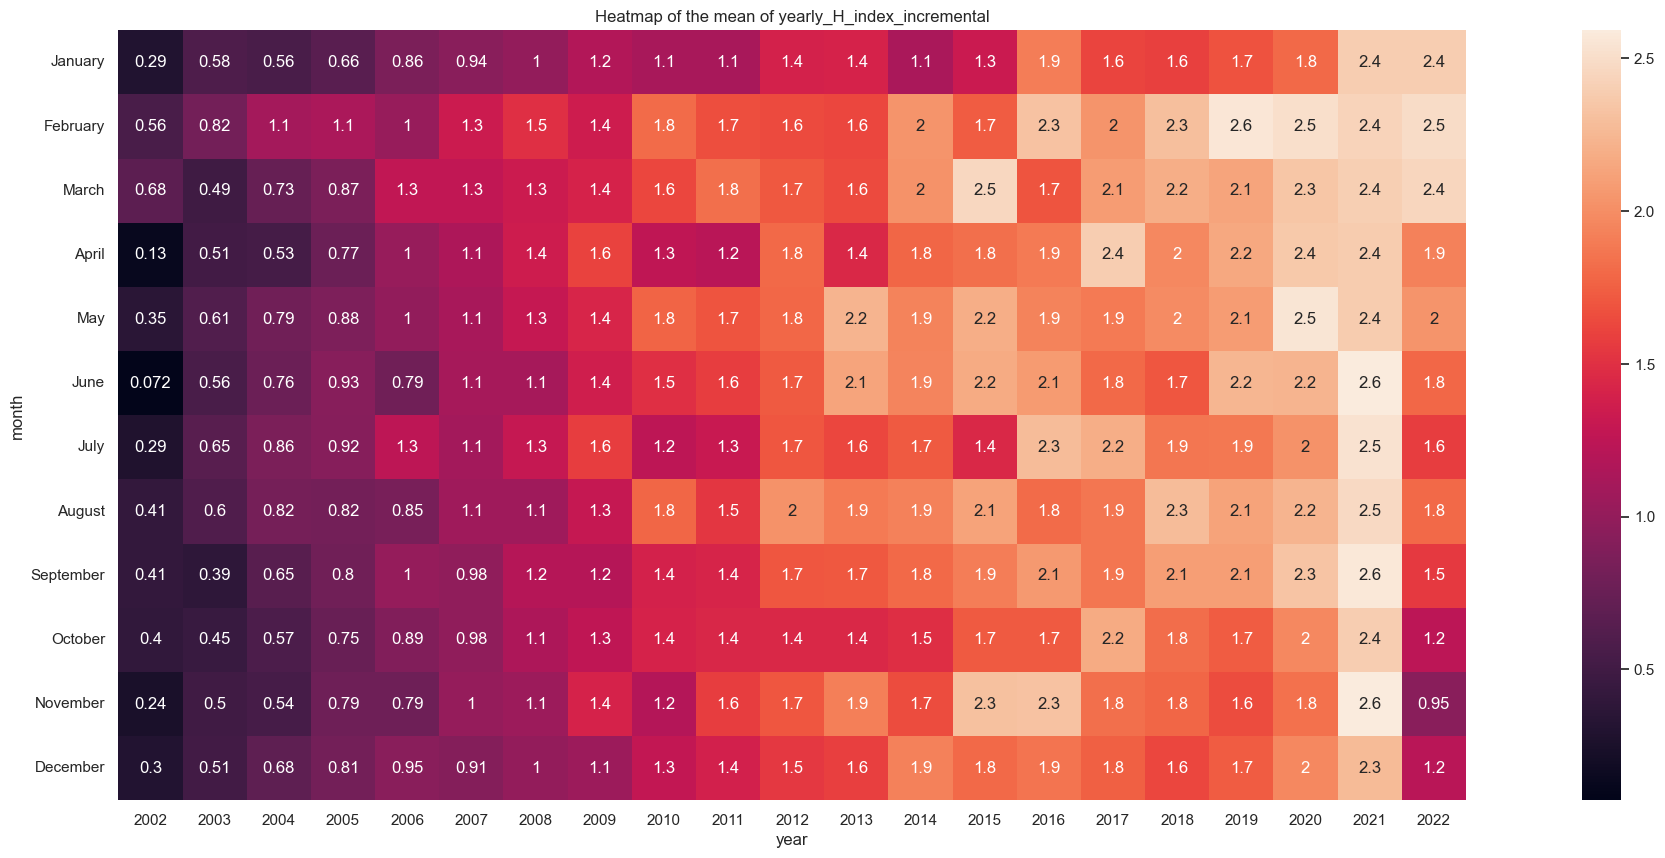

In [30]:
for column in ['yearly_H_index_notincremental','yearly_H_index_incremental','monthly_H_index_incremental','monthly_H_index_notincremental']:
    heatmap_data = pd.pivot_table(
    df_full_extended, values=column, index="month", columns="year", aggfunc=np.mean
    )

    sns.set(rc={"figure.figsize": (30, 10)})
    sns.heatmap(heatmap_data, annot=True, square=True).set(
    title="Heatmap of the mean of "+str(column)
    )
    plt.show()

__Observations__

Just as expected, there is an increase of the number and the dimension of all h-indices with time that we see through the increase of the mean of the h-indices. The last year is a bit an exception, but this is just due to the fact, that we do not have all the data for 2022.
It is interesting to see, that there is an increase of the mean of the h-indices also for the not incremental h-indices. This is due to the increase of the interconnectivity whithin the field of encryption technologies.

We now want to visualize the correlation between all the variables of "df_full_extended".

In [31]:
df_full_extended_pairplot = df_full_extended[['paper','cosine_similarity','year','month','score_concepts','yearly_H_index_notincremental','yearly_H_index_incremental','monthly_H_index_incremental','monthly_H_index_notincremental']]
df_full_extended_pairplot = df_full_extended_pairplot.drop_duplicates()

In [32]:
df_full_extended_pairplot

paper  cosine_similarity  year     month  \
0       https://openalex.org/W1000018889             0.3738  2013  December   
0       https://openalex.org/W1000018889             0.3339  2013  December   
0       https://openalex.org/W1000018889             0.3110  2013  December   
0       https://openalex.org/W1000018889             0.2798  2013  December   
0       https://openalex.org/W1000018889             0.2749  2013  December   
...                                  ...                ...   ...       ...   
431112   https://openalex.org/W999914091             0.4641  2013     March   
431112   https://openalex.org/W999914091             0.4246  2013     March   
431112   https://openalex.org/W999914091             0.4054  2013     March   
431112   https://openalex.org/W999914091             0.3436  2013     March   
431112   https://openalex.org/W999914091             0.3342  2013     March   

        score_concepts  yearly_H_index_notincremental  \
0             0.000000                            1.0   
0             0.000000                            1.0   
0             0.000000                            1.0   
0             0.000000                            1.0   
0             0.000000                            1.0   
...                ...                            ...   
431112        0.531453                            0.0   
431112        0.531453                            0.0   
431112        0.531453                            0.0   
431112        0.531453                            0.0   
431112        0.531453                            0.0   

        yearly_H_index_incremental  monthly_H_index_incremental  \
0                              1.0                          1.0   
0                              1.0                          1.0   
0                              1.0                          1.0   
0                              1.0                          1.0   
0                              1.0                          1.0   
...                            ...                          ...   
431112                         0.0                          0.0   
431112                         0.0                          0.0   
431112                         0.0                          0.0   
431112                         0.0                          0.0   
431112                         0.0                          0.0   

        monthly_H_index_notincremental  
0                                  0.0  
0                                  0.0  
0                                  0.0  
0                                  0.0  
0                                  0.0  
...                                ...  
431112                             0.0  
431112                             0.0  
431112                             0.0  
431112                             0.0  
431112                             0.0  

[3031513 rows x 9 columns]

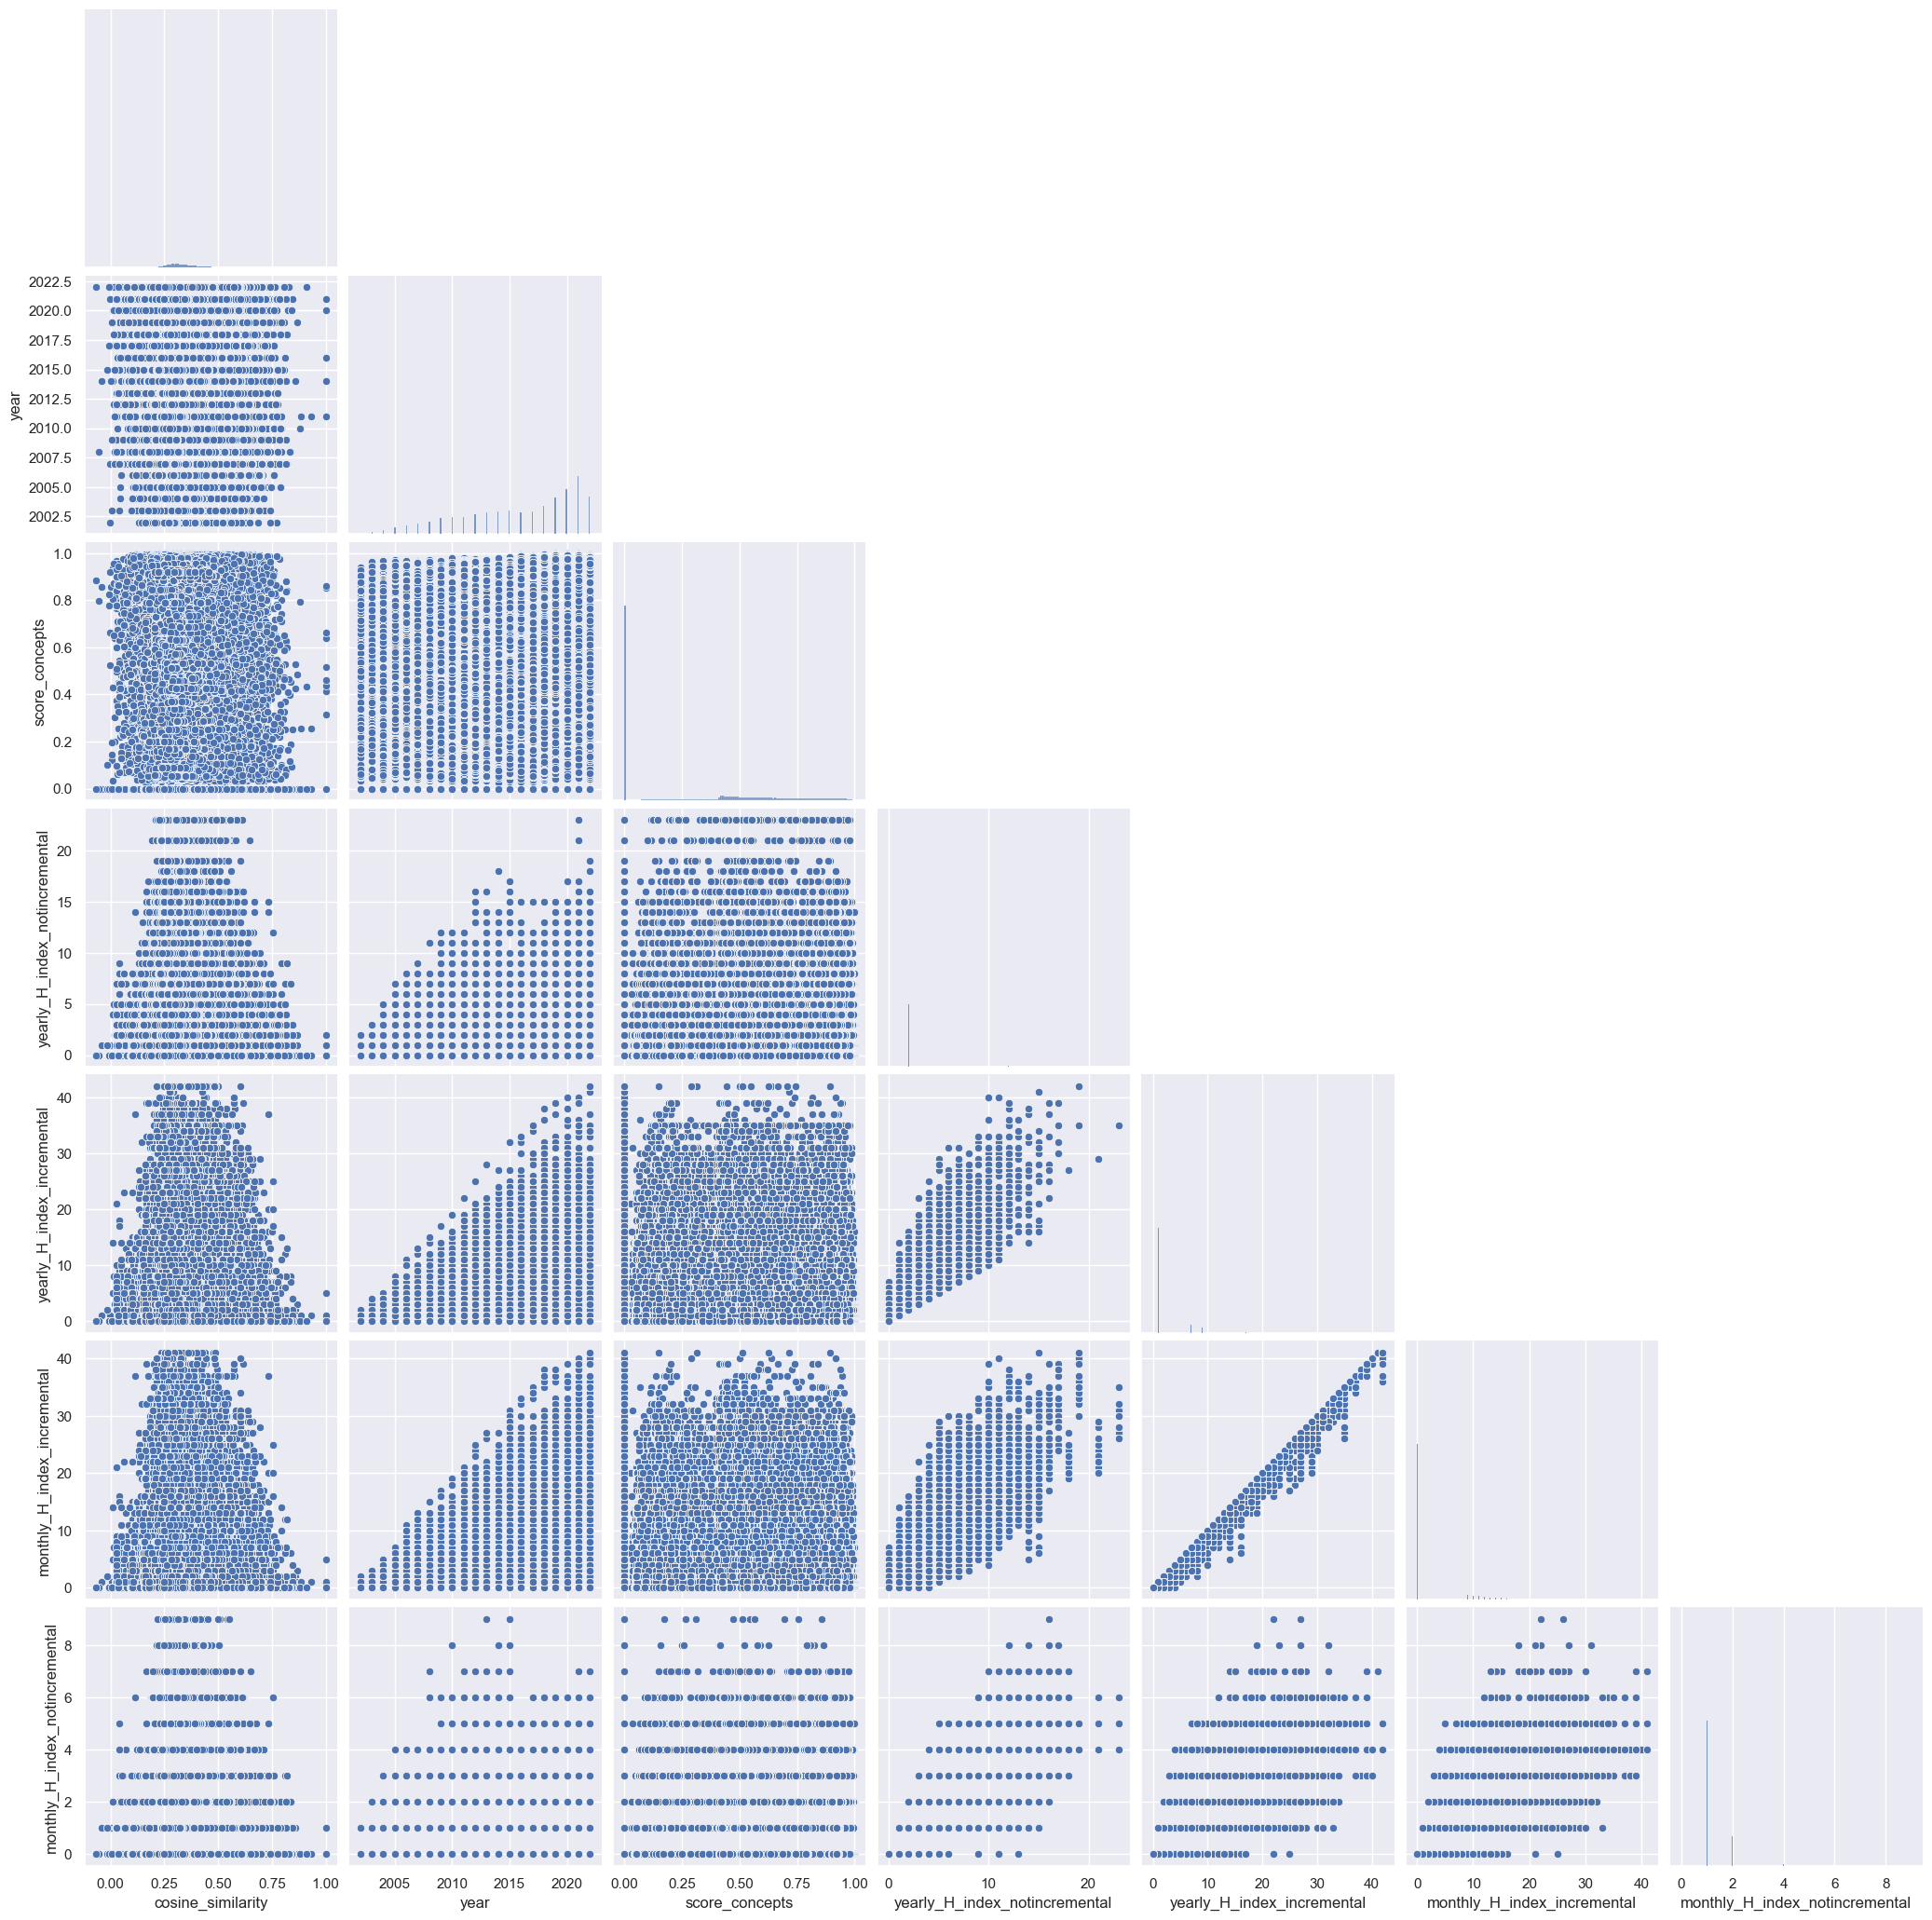

In [33]:
sns.pairplot(df_full_extended_pairplot, height=3,corner=True)
plt.show()

# try with subdataset only the values we can analyze!

__Observations__

The distribution of our variables shown in the diagonal are just as done previously in the analyses of the variables one by one. Of course, it is a bit difficult to see everything, but this is mostly due to the scales.\
Regarding the cosine similarity, we see that high h-indices are correlated with an average cosine similarity between 0.3 and 0.7 approximatively, while a low cosine similarity occurs with every possible h-index.\
For the year, regarding the h-indices there is naturally an increase of the h-indices with time, just as expected. As we already analyzed before, the cosine similarity and the score of attribution are distributed quite uniformly over time. \
Regarding the score of concept, they are distributed everywhere, but a bit more sparse for higher h-indices, just as expected.\
Regarding the yearly h-index not incremental, it is interesting to see that it is a bit correlated with all the other h-indices.\
Regarding the yearly h-index incremental, we see that it is a bit correlated with the monthly h-index not incremental and with the yearly h-index not incremental. As expected, it is very correlated with the monthly h-index incremental.\
Regarding the monthly h-index incremental we obtain a very similar correlation with other variables just as for the yearly h-index incremental.

__Conclusion__

Just as expected the cosine similarity and the score of attribution to concepts are not correlated with the h-indices. We should prefer monthly incremental h-indices over yearly incremental h-indices, because they convey almost the same information, but the monthly variable is a bit more fine-grained.\
We could use the monthly not incremental h-index, but this could create a bias or just a lack of meaningful information since most of them are just zero. We should find a smart way to use this information efficiently. The yearly not incremental h-indices seem to be a better fit for modelling, because it is more balanced and it contains more information.

In [34]:
df_full_extended_pairplot.corr()

cosine_similarity      year  score_concepts  \
cosine_similarity                        1.000000 -0.022886        0.001667   
year                                    -0.022886  1.000000        0.049898   
score_concepts                           0.001667  0.049898        1.000000   
yearly_H_index_notincremental           -0.040003  0.123928        0.022131   
yearly_H_index_incremental              -0.039211  0.140644        0.010490   
monthly_H_index_incremental             -0.039062  0.136749        0.007806   
monthly_H_index_notincremental          -0.037586  0.091245        0.022841   

                                yearly_H_index_notincremental  \
cosine_similarity                                   -0.040003   
year                                                 0.123928   
score_concepts                                       0.022131   
yearly_H_index_notincremental                        1.000000   
yearly_H_index_incremental                           0.904714   
monthly_H_index_incremental                          0.877273   
monthly_H_index_notincremental                       0.820370   

                                yearly_H_index_incremental  \
cosine_similarity                                -0.039211   
year                                              0.140644   
score_concepts                                    0.010490   
yearly_H_index_notincremental                     0.904714   
yearly_H_index_incremental                        1.000000   
monthly_H_index_incremental                       0.991850   
monthly_H_index_notincremental                    0.735871   

                                monthly_H_index_incremental  \
cosine_similarity                                 -0.039062   
year                                               0.136749   
score_concepts                                     0.007806   
yearly_H_index_notincremental                      0.877273   
yearly_H_index_incremental                         0.991850   
monthly_H_index_incremental                        1.000000   
monthly_H_index_notincremental                     0.726210   

                                monthly_H_index_notincremental  
cosine_similarity                                    -0.037586  
year                                                  0.091245  
score_concepts                                        0.022841  
yearly_H_index_notincremental                         0.820370  
yearly_H_index_incremental                            0.735871  
monthly_H_index_incremental                           0.726210  
monthly_H_index_notincremental                        1.000000

In [35]:
corr_df = pd.DataFrame(np.tril(df_full_extended_pairplot.corr()))

In [36]:
corr_df_lowtriangular = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))

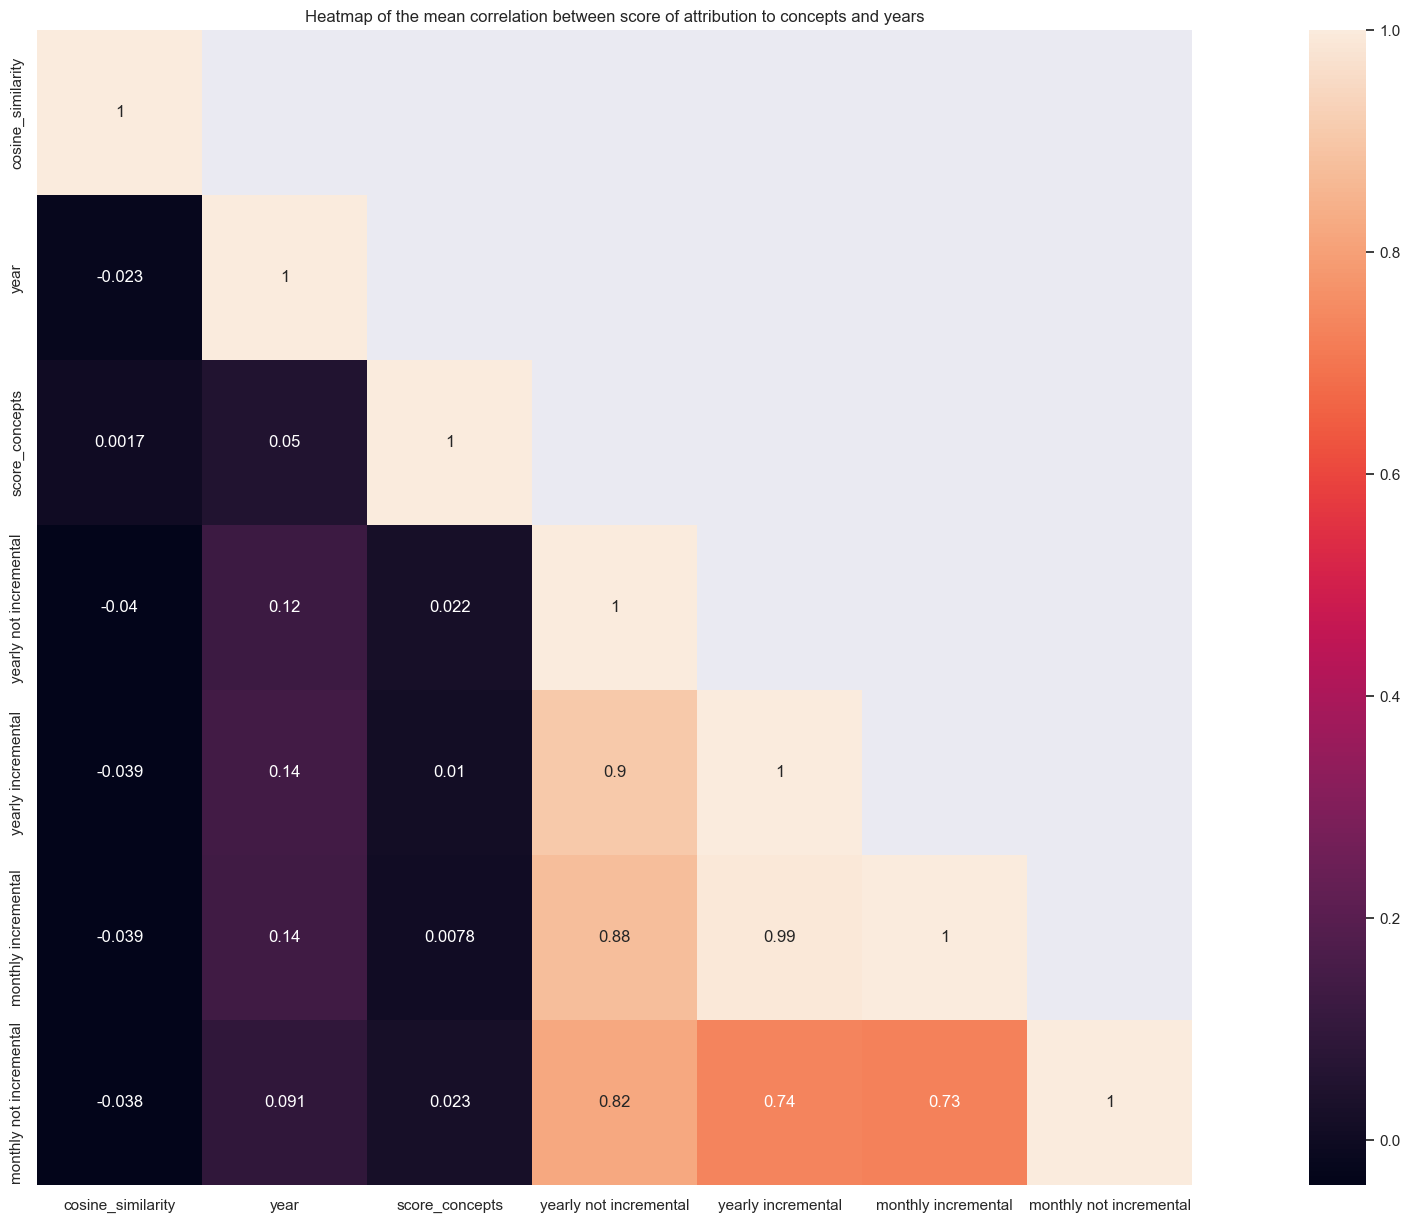

In [37]:
sns.set(rc={"figure.figsize": (30, 15)})
sns.heatmap(corr_df_lowtriangular, annot=True, square=True).set(
title="Heatmap of the mean correlation between score of attribution to concepts and years",
xticklabels=['cosine_similarity','year','score_concepts','yearly not incremental','yearly incremental','monthly incremental','monthly not incremental'],
yticklabels=['cosine_similarity','year','score_concepts','yearly not incremental','yearly incremental','monthly incremental','monthly not incremental'])
plt.show()

__Observations__

As expected, the variables ```year```, ```cosine_similarity``` and ```score_concepts``` are very indepedent variables that are not correlated to the other variables.\
Regarding the yearly not incremental h-index, we see that it is very correlated with the monthly and yearly incremental h-index and even with the monthly not incremental h-index. This is probably due to the similar distributions h-indices we have among them.\
Regarding the yearly incremental h-index, we see that it is very correlated with the monthly incremental h-index (as expected) and quite well correlated with the monthly not incremental h-index (surprisingly).\
The monthly incremental h-index is quite correlated with the monthly not incremental h-index. This is probably due to the high concentration of zeroes and ones in both datasets.

# **2) Correlation analysis among some of my datasets** 

In [ ]:
infile_df_full_cleaned = open('data_exploratory_analysis/df_full_cleaned','rb')
df_full_cleaned = pickle.load(infile_df_full_cleaned)
infile_df_full_cleaned.close()

In [ ]:
infile_dicofconcepts_full = open('../creation_data_and_variables/data_creation_variables/dicofconcepts','rb')
dfconcepts = pickle.load(infile_dicofconcepts_full)
infile_dicofconcepts_full.close()

In [ ]:
infile_dfkeywords_full = open('../creation_data_and_variables/data_creation_variables/dfkeywords','rb')
dfkeywords = pickle.load(infile_dfkeywords_full)
infile_dfkeywords_full.close()

In [ ]:
infile_df_h_indices = open('../creation_data_and_variables/data_creation_variables/df_h_indices','rb')
dfhindices = pickle.load(infile_df_h_indices)
infile_df_h_indices.close()

__2.1) H-indices and concepts__

In this part we will compute and visualize the mutual influence between h-indices and concepts.

In [73]:
list_concepts= ['Authentication protocole','Biometrics','Blockchain','Differential Privacy','Digital rights management',
'Digital signature','Disk Encryption','Distributed algorithm','Electronic voting','Functional encryption',
'Hardware acceleration','Hardware security module','Hash function','Homomorphic encryption','Identity management',
'Key management','Link encryption','Post-quantum cryptography','Public-key cryptography','Quantum key distribution',
'Quantum cryptography','Random number generation','Symmetric-key algorithm','Threshold cryptosystem',
'Trusted Computing','Tunneling protocol','Zero-knowlegde proof']

We select subsets of our dataframes and then define a function.

In [74]:
df_authors = df_full_cleaned[['paper','author']]

In [75]:
df_authors = df_authors.drop_duplicates()

In [76]:
df_hindices_year = dfhindices[['author','year','yearly_H_index_notincremental','yearly_H_index_incremental']]

In [77]:
df_hindices_year = df_hindices_year.drop_duplicates()

We check that the number of authors is the same in both dataframes which should be the case by construction.

In [78]:
len(list(set(dfhindices.author.tolist())))

180270

In [79]:
len(list(set(df_full_cleaned.author.tolist())))

180270

The function returns the number of h-indices in a list of given intervalls for a dataset of authors.

In [80]:
def h_indices_concept(list_indices,tech,dfconcepts,df_authors,df_hindices):
    
    # we select the paper related to a certain technology
    df_intermed = dfconcepts.loc[dfconcepts['technologies']==tech].copy()
    df_myconcept = df_intermed.loc[df_intermed['score']!=0].copy()
    papers_myconcept = list(set(df_myconcept.paper.tolist()))
    
    # we select all the authors related to these papers
    df_mypapers = df_authors.loc[df_authors['paper'].isin(papers_myconcept)].copy()
    myauthors = list(set(df_mypapers.author.tolist()))
    
    h_indices_incremental = [0,0,0,0,0,0]
    
    dfallauthors = df_hindices.loc[df_hindices['author'].isin(myauthors)].copy()
    
    for author in myauthors:
        dfauthor = dfallauthors.loc[dfallauthors['author']==author].copy()

        list_incremental_indices = dfauthor.yearly_H_index_incremental.tolist()
        # we compute the number of h-indices which are in certain intervall
        for i in range(len(list_indices)-1):
            list_forindex = [x for x in list_incremental_indices if list_indices[i+1]>x>=list_indices[i]]
            h_indices_incremental[i]=h_indices_incremental[i]+len(list_forindex)

    return h_indices_incremental

In [81]:
#creating some variables for further use
my_years = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

df_hindices_2022 = df_hindices_year.loc[df_hindices_year['year']==2022].copy()

mylabel = ['0','1','2-4','5-9','10-19','20+']

list_concepts_data = [x for x in list_concepts if x not in ['Differential Privacy','Disk Encryption']]


In [83]:
list_list_hindices = list(map(lambda x: h_indices_concept([0,1,2,5,10,20,100],x,dfconcepts,df_authors,\
                    df_hindices_2022),tqdm(list_concepts_data))) 

100%|██████████████████████████████████████████████████████████████████████████████| 25/25 [12:01<00:00, 28.84s/it]


For each concept we now visualize the proportion of yearly incremental h-indices for all the authors related to this concept.

In [84]:
len(list_list_hindices)

25

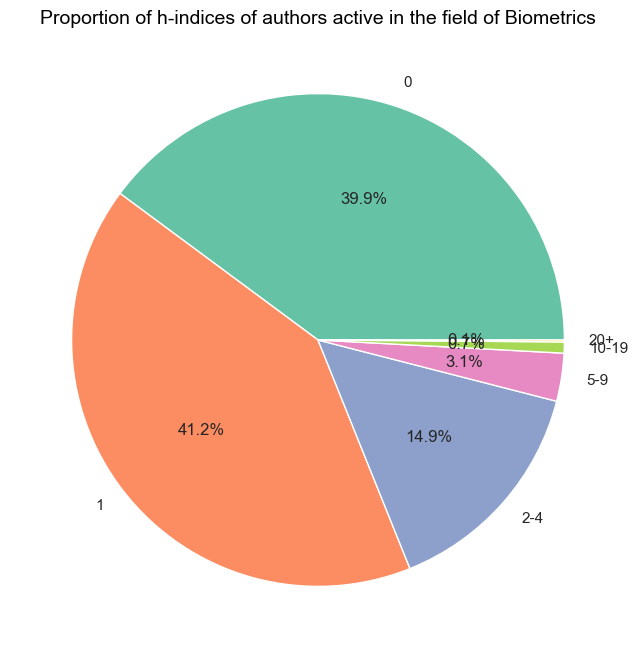

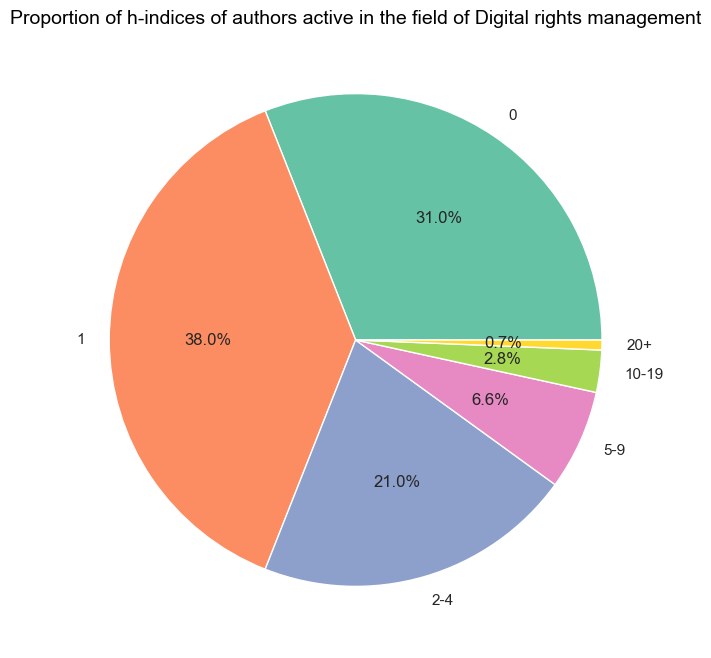

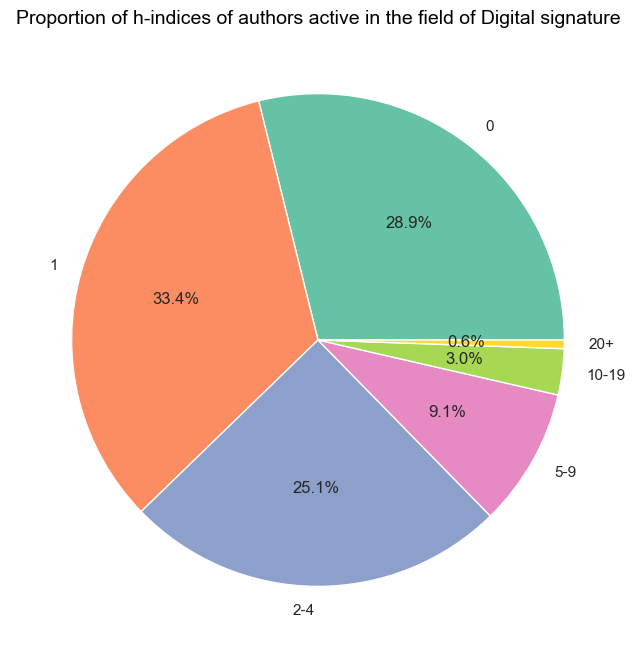

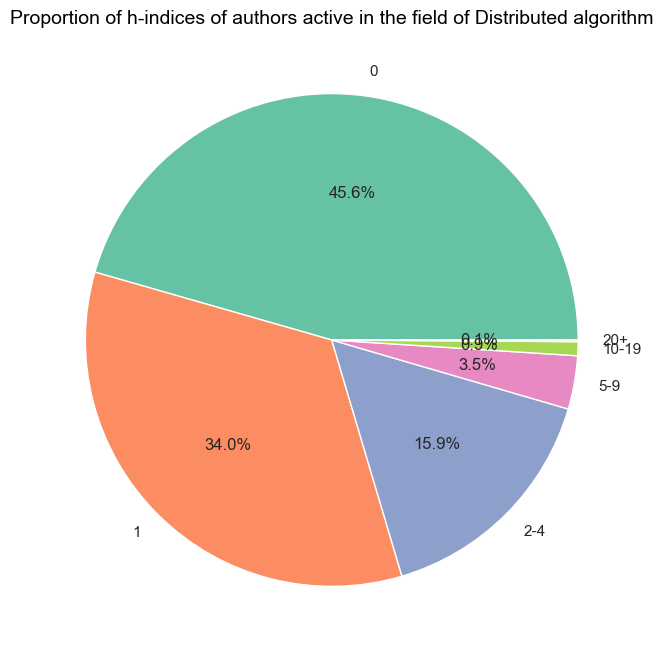

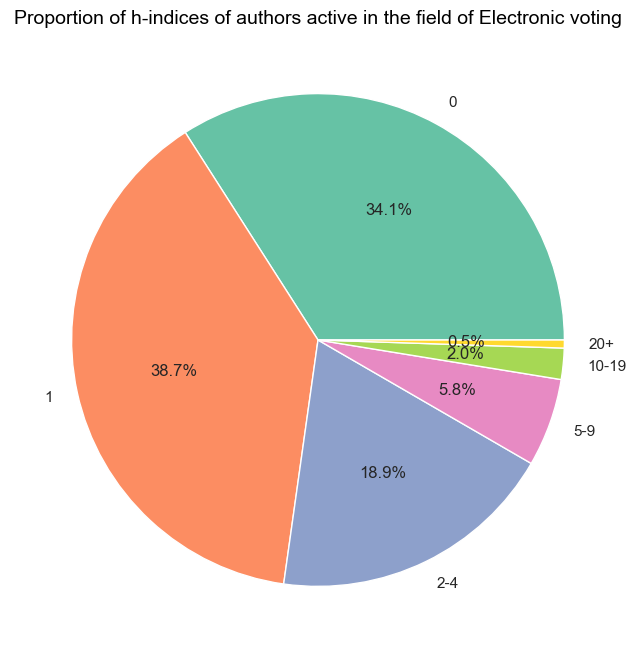

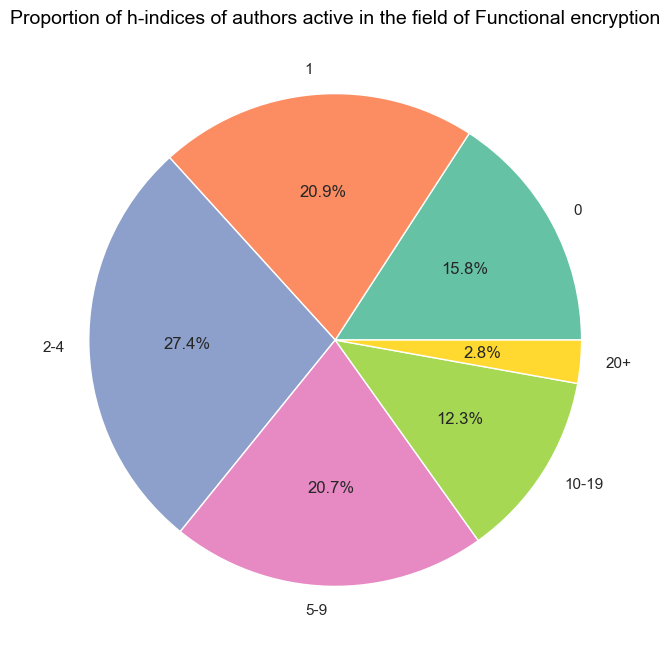

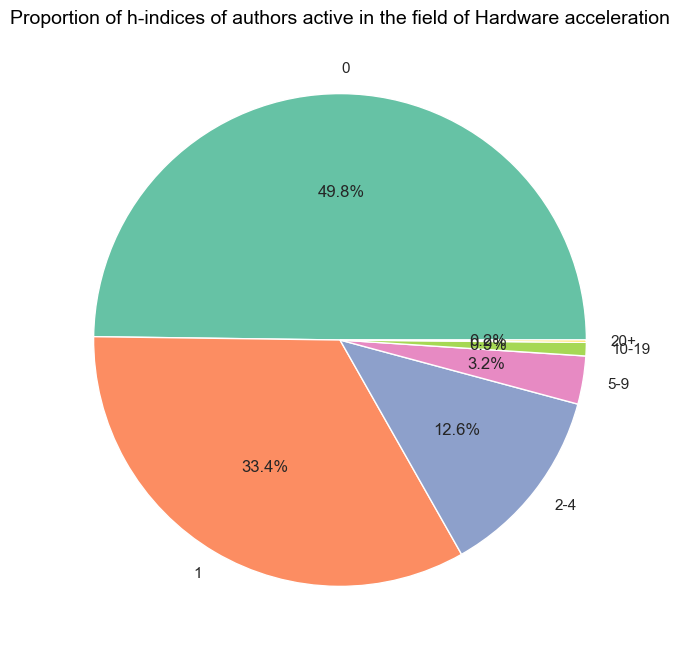

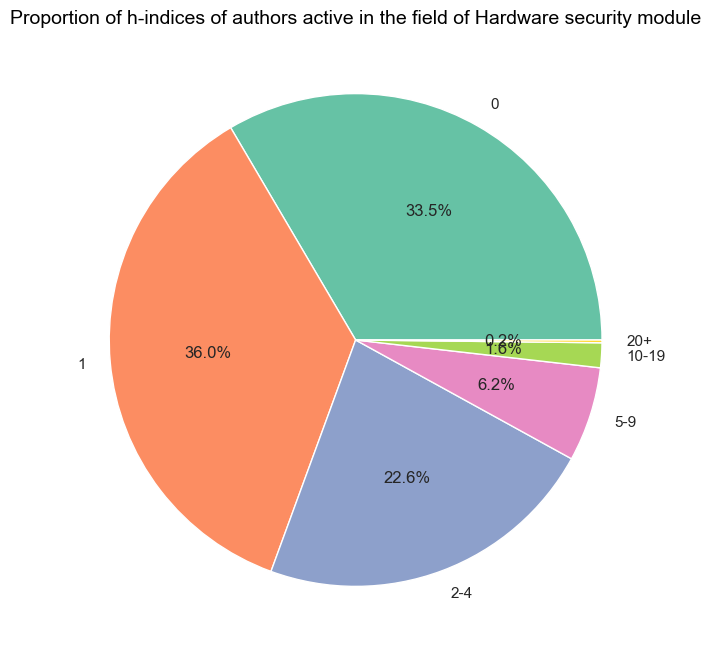

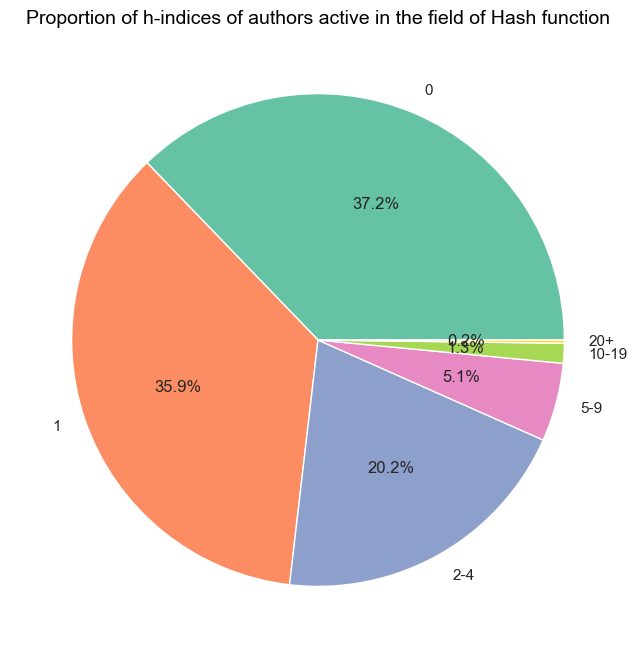

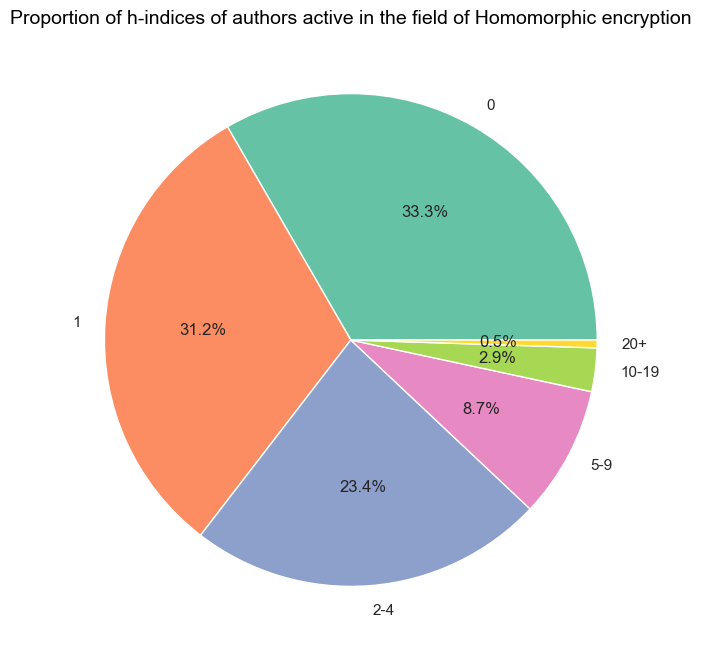

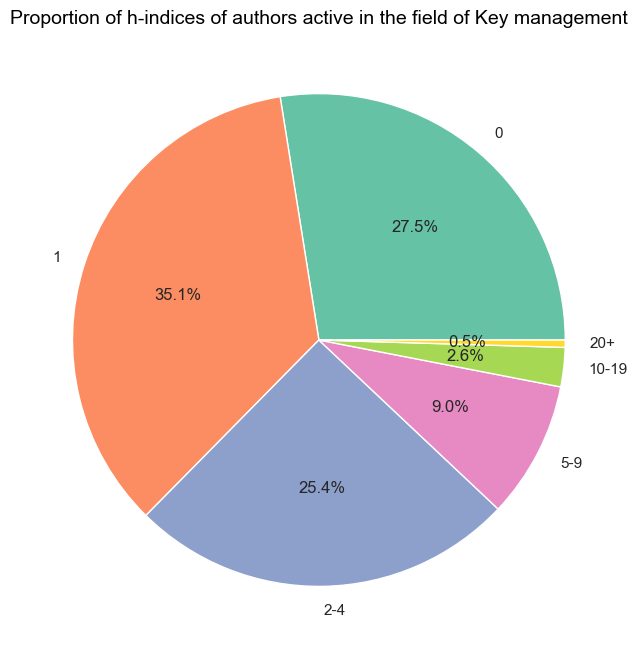

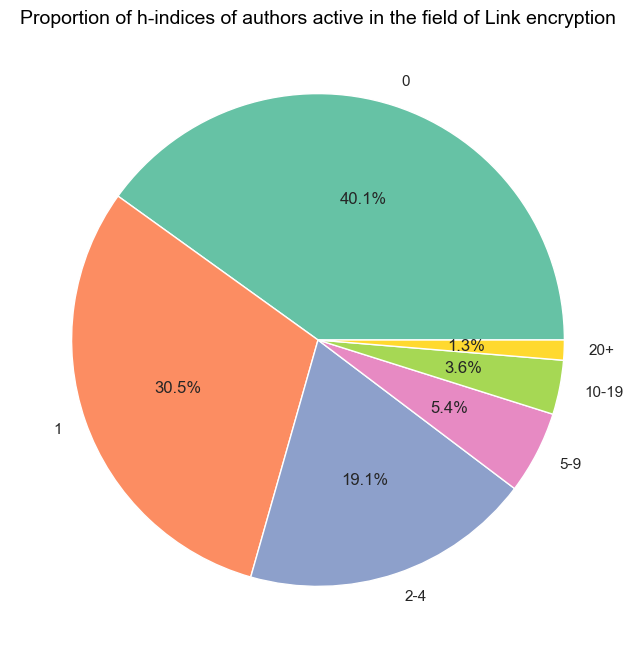

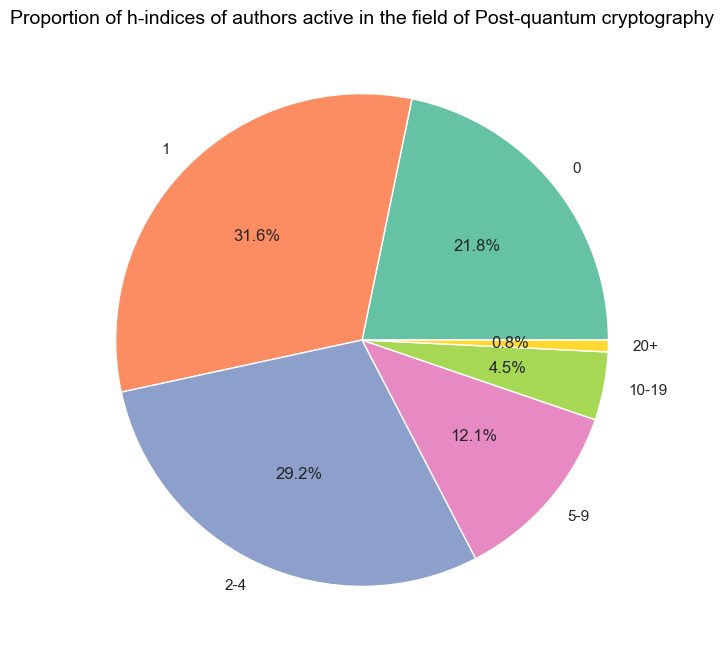

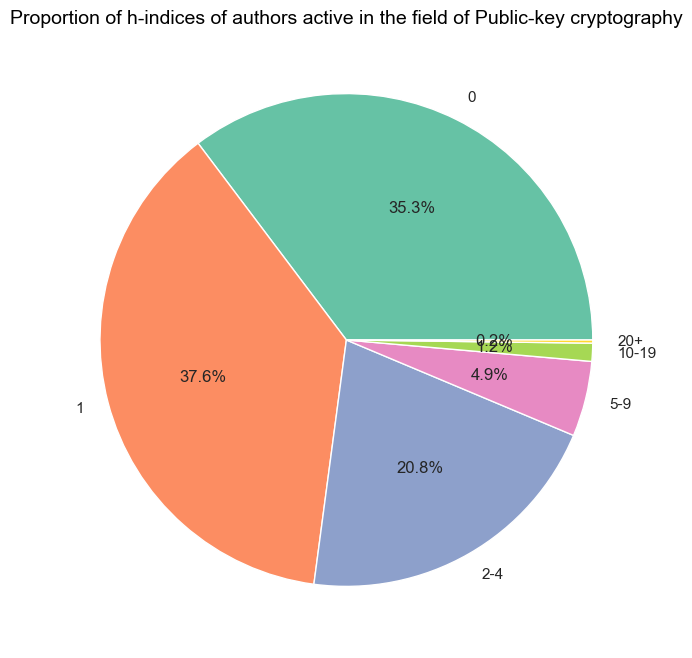

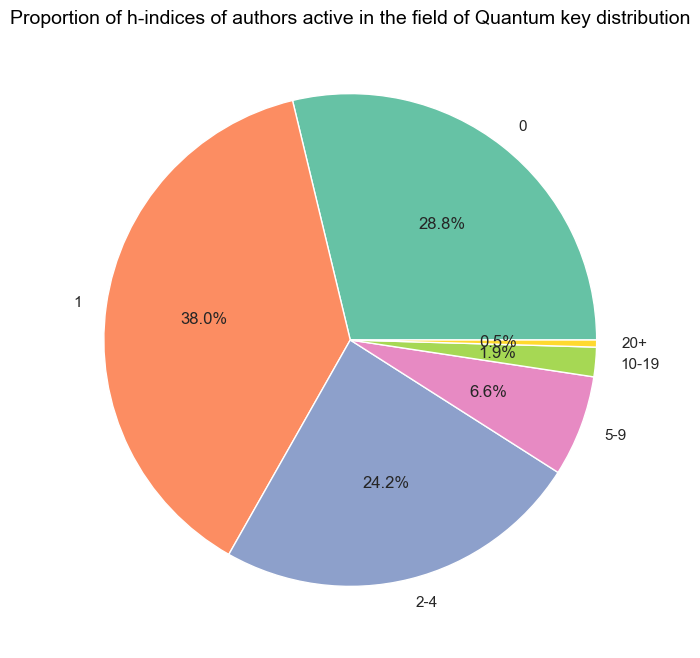

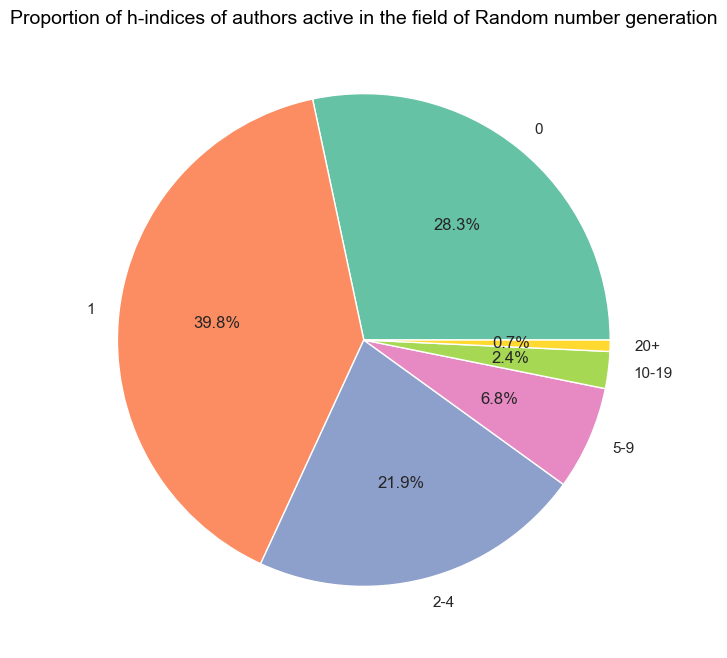

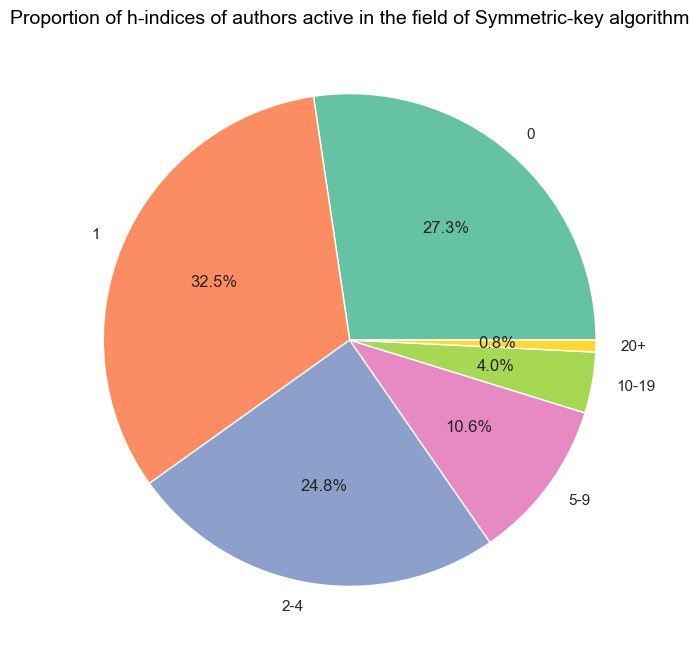

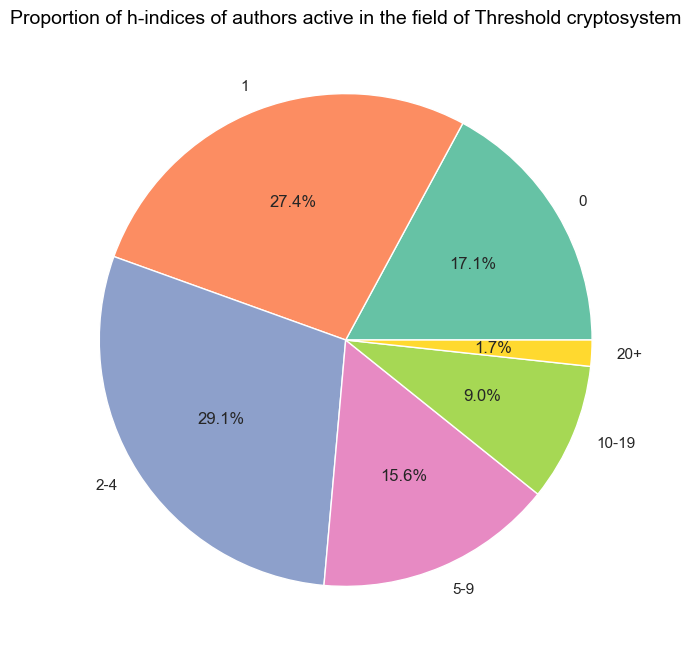

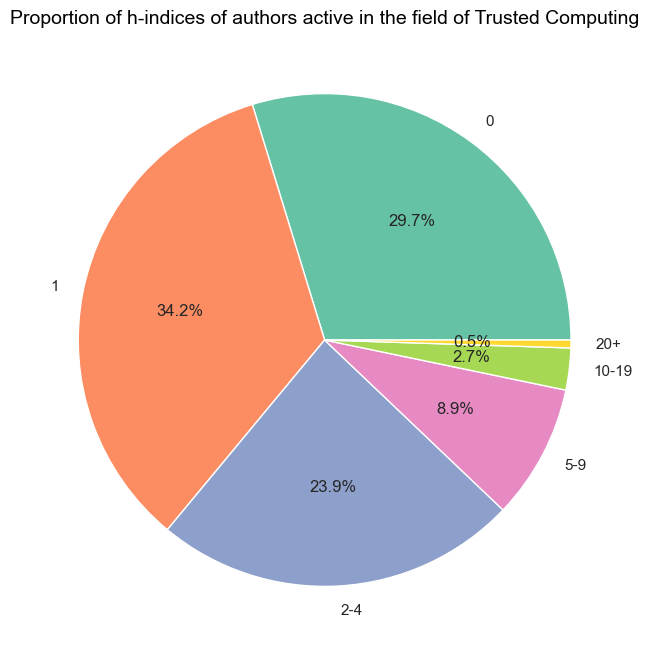

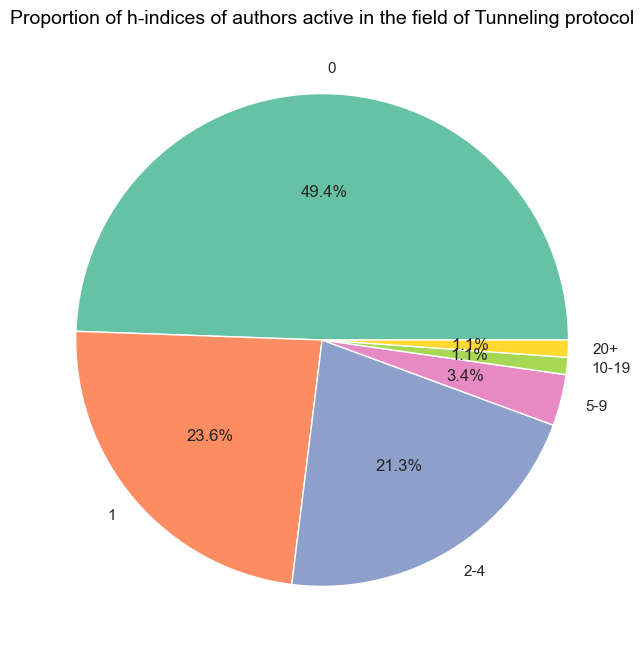

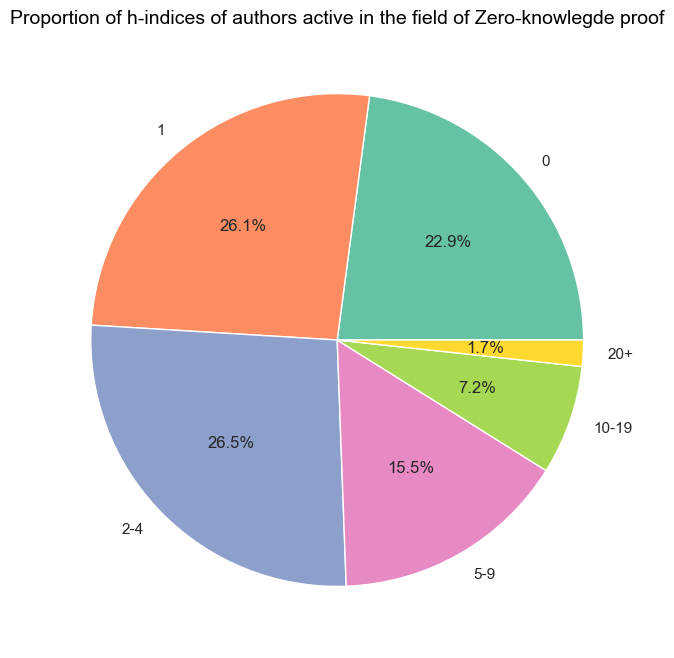

In [85]:
j = 0
for tech in list_concepts_data:    
    h_indices_incremental = list_list_hindices[j]
    
    #a problem with the first tech

    colors = sns.color_palette("Set2")

    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(8)
    # creating the pie chart
    plt.pie(h_indices_incremental, labels =mylabel, colors=colors, autopct="%0.1f%%")

    # title
    plt.title("Proportion of h-indices of authors active in the field of "+str(tech),
    color="black",fontsize=14)

    # calling the pie chart
    plt.show()
    j= j+1

__2.2) Concepts and keywords__

In this part we will compute and visualize the mutual influence between keywords and concepts.

In [86]:
list_concepts= ['Authentication protocole','Biometrics','Blockchain','Differential Privacy','Digital rights management',
'Digital signature','Disk Encryption','Distributed algorithm','Electronic voting','Functional encryption',
'Hardware acceleration','Hardware security module','Hash function','Homomorphic encryption','Identity management',
'Key management','Link encryption','Post-quantum cryptography','Public-key cryptography','Quantum key distribution',
'Quantum cryptography','Random number generation','Symmetric-key algorithm','Threshold cryptosystem',
'Trusted Computing','Tunneling protocol','Zero-knowlegde proof']

In [87]:
dfconcepts

paper               technologies score  \
0        https://openalex.org/W2557697231   Authentication protocole     0   
1        https://openalex.org/W2557697231                 Biometrics     0   
2        https://openalex.org/W2557697231                 Blockchain     0   
3        https://openalex.org/W2557697231       Differential Privacy     0   
4        https://openalex.org/W2557697231  Digital rights management     0   
...                                   ...                        ...   ...   
3540235    https://openalex.org/W78398906    Symmetric-key algorithm     0   
3540236    https://openalex.org/W78398906     Threshold cryptosystem     0   
3540237    https://openalex.org/W78398906          Trusted Computing     0   
3540238    https://openalex.org/W78398906         Tunneling protocol     0   
3540239    https://openalex.org/W78398906       Zero-knowlegde proof     0   

        publication_date  year     month  
0             2016-12-07  2016  December  
1             2016-12-07  2016  December  
2             2016-12-07  2016  December  
3             2016-12-07  2016  December  
4             2016-12-07  2016  December  
...                  ...   ...       ...  
3540235       2009-01-01  2009   January  
3540236       2009-01-01  2009   January  
3540237       2009-01-01  2009   January  
3540238       2009-01-01  2009   January  
3540239       2009-01-01  2009   January  

[3540240 rows x 6 columns]

The function below returns a dictionary containing the relative importance of each keyword in each technology field compared to the number of published papers in this technological field.

In [88]:
def dico_concept_keyword(tech,dfconcepts,dfkeywords):
    
    # we select all the papers related to this technology
    df_intermed = dfconcepts.loc[dfconcepts['technologies']==tech].copy()
    df_myconcept = df_intermed.loc[df_intermed['score']!=0].copy()
    papers_myconcept = list(set(df_myconcept.paper.tolist()))
    
    numberpapers = len(papers_myconcept)
    
    # We define a dictionary that we will then fill in
    dicokeywords = {}
    
    # we select all the rows in the dataframe of keywords related to the papers in question
    dfkey_paper= dfkeywords.loc[dfkeywords['paper'].isin(papers_myconcept)].copy()
    
    #we fill in the dictionary
    for paper in papers_myconcept:
        # we select the keywords related to the paper
        keyinfo_mypaper = dfkey_paper.loc[dfkey_paper['paper']==paper].copy()
        mykeywords = keyinfo_mypaper.keyword.tolist()
        for keyword in mykeywords:
            # we select the information related to each keyword
            infokeyword = keyinfo_mypaper.loc[keyinfo_mypaper['keyword']==keyword].copy()
            cosim = infokeyword.cosine_similarity.tolist()[0]
            
            # if the keyword is already in the dictionary we update the count, if not we just count it as first occurence
            if keyword in dicokeywords:
                dicokeywords[keyword] = dicokeywords[keyword] + cosim
            else:
                dicokeywords[keyword] = cosim
                
    # we now divide the value by the number of papers related to this technology, to have a relative importance of each keyword
    #in each technology field compared to the number of published papers.
    dicokeywords.update((x, round(y/numberpapers,3)) for x, y in dicokeywords.items())
    return dicokeywords

We now do the computations for each concept.

In [89]:
listdico_tech = list(map(lambda x: dico_concept_keyword(x,dfconcepts,dfkeywords),tqdm(list_concepts)))

100%|██████████████████████████████████████████████████████████████████████████████| 27/27 [18:35<00:00, 41.31s/it]


We now get an overview of the most important keywords for each technological field.

In [90]:
j = 0
for tech in list_concepts: 
    dico_bestkeywords = {}
    dico_secondbestkeywords = {}
    dicokeywords=listdico_tech[j].copy()

    for i in range(30):
        #
        if i <15:
            # we create a dictionary with the second best keywords (1-15)
            v = list(dicokeywords.values())
            k = list(dicokeywords.keys())
            if len(k)!=0:
                #we delete the best value from the old dictionary, such that at the next iteration
                # the best value will be the second best value of the original dictionary and so on.
                del dicokeywords[k[v.index(max(v))]]
                # we add the best value of the dictionary to our new dictionary
                dico_bestkeywords[k[v.index(max(v))]]=max(v)
        else:
            # we create a dictionary with the second best keywords (15-30)
            v = list(dicokeywords.values())
            k = list(dicokeywords.keys())
            if len(k)!=0:
                #we delete the best value from the old dictionary, such that at the next iteration
                # the best value will be the second best value of the original dictionary and so on.
                del dicokeywords[k[v.index(max(v))]]
                # we add the best value of the dictionary to our new dictionary
                dico_secondbestkeywords[k[v.index(max(v))]]=max(v)

    print('For the technology '+str(tech)+' the most important keywords are:')
    print(dico_bestkeywords)   
    print(' ')
    
    print('For the technology '+str(tech)+' the second most important group of keywords is:')
    print(dico_secondbestkeywords)   
    print(' ')
    print(' ')
    
    j=j+1

For the technology Authentication protocole the most important keywords are:
{'protocol': 0.286, 'authent': 0.126, 'password': 0.069, 'rfid': 0.068, 'scheme': 0.048, 'cryptographi': 0.032, 'iot': 0.031, 'cryptograph': 0.03, 'attack': 0.029, 'mobil': 0.026, 'secur': 0.025, 'network': 0.022, 'communic': 0.022, 'encrypt': 0.019, 'cryptanalysi': 0.018}
 
For the technology Authentication protocole the second most important group of keywords is:
{'wireless': 0.017, 'sensor': 0.017, 'hash': 0.015, 'cryptosystem': 0.011, 'comput': 0.011, 'devic': 0.011, '802': 0.01, 'ident': 0.01, 'quantum': 0.009, 'remot': 0.009, 'biometr': 0.009, 'vanet': 0.009, 'vehicular': 0.009, 'vehicl': 0.009, 'propos': 0.008}
 
 
For the technology Biometrics the most important keywords are:
{'biometr': 0.105, 'fingerprint': 0.067, 'iri': 0.062, 'recognit': 0.032, 'algorithm': 0.03, 'detect': 0.026, 'identif': 0.023, 'palmprint': 0.02, 'fusion': 0.018, 'wavelet': 0.016, 'neural': 0.015, 'sensor': 0.015, 'facial': 0.01